In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from datetime import datetime, date
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import spacy

In [2]:
start_page=16
end_page=18
start_url = 'https://www.athensvoice.gr/tags/metoo/?pg='

In [3]:
athensvoice_article_links=[]

for page_num in range(start_page, end_page+1):
  page_url = start_url + str(page_num)
  response = requests.get(page_url)
  doc = BeautifulSoup(response.text, 'html.parser')
  athensvoice_original = doc.find('div',  attrs={'class': 'articles articles--singleColumn articles--large'}).find_all('a')# πήρα τον γενικό κώδικα που περιλαμβάνει όλα τα λινκσ
  for i in athensvoice_original:
    end = str(i).find('>')# το > δειχνει το τελος του link
    link = str(i)[9:end-1]#9 χαρακτήρες  <a href=" ετσι ζητάμε να πάρει μόνο το λινκ
    if (link not in athensvoice_article_links):
      if(' ' not in  link ):
        athensvoice_article_links.append(link)


In [4]:
athensvoice_article_links = list(filter(None, athensvoice_article_links))
athensvoice_article_links

['https://www.athensvoice.gr/politismos/mousiki/704016/tha-mporoyse-kapoios-san-ton-gainsbourg-na-tragoydaei-simera/',
 'https://www.athensvoice.gr/epikairotita/politiki-oikonomia/704095/metoo-kai-theatro-toy-paralogoy/',
 'https://www.athensvoice.gr/epikairotita/politiki-oikonomia/703947/kai-ystera-irthan-ta-kommata/',
 'https://www.athensvoice.gr/epikairotita/ellada/703823/i-sofia-mpekatoroy-stirizei-metoogreece/',
 'https://www.athensvoice.gr/epikairotita/politiki-oikonomia/703678/mitsotakis-kanena-mystiko-den-me-syndeei-me-tin-mendoni/',
 'https://www.athensvoice.gr/epikairotita/ellada/703662/poinikos-kodikas-aystiroteres-poines-gia-sexoyalika-adikimata/',
 'https://www.athensvoice.gr/epikairotita/ellada/703660/metoogovgr-chat-gia-kataggelies-sexoyalikis-parenohlisis/',
 'https://www.athensvoice.gr/epikairotita/politiki-oikonomia/703643/voyli-live-i-omilia-toy-kyriakoy-mitsotaki/',
 'https://www.athensvoice.gr/epikairotita/politiki-oikonomia/703422/apo-elliniko-metoo-sto-elliniko-q

In [5]:
full_articles_list = []

for url in athensvoice_article_links:
  response  = requests.get(url)
  soup = BeautifulSoup(response.text, 'html.parser')
  article_dict = {}

  try:
    title = soup.find('h1' , {'class':'articleSingle__title'}).text
    article_dict['title'] = title
  except:
    article_dict['title'] = ''
    pass
  try: #λεμε να ενωσει παραγραφους
      p_texts_list = []
      paragraphs = soup.find_all('p')
      for p in paragraphs:
        p_texts_list.append(p.text)
        full_text = ' '.join(p_texts_list)
        full_text = "".join(full_text.splitlines())
        article_dict['full_text'] = full_text
  except:
    article_dict['full_text'] = ''
    pass

  try:
      author = soup.find_all('li' , {'class': "actionsList__item"})[1:]
      kati = author[0].find('span').text
      author = kati
      article_dict['author'] = author
  except:
    article_dict['author'] = ''
    pass
  try:
    date = soup.find('time')['datetime']
    article_dict['date'] = date
  except:
    article_dict['date'] = 'No date found'

  full_articles_list.append(article_dict)

In [6]:
article_df = pd.DataFrame(full_articles_list)

In [7]:
article_df.head(5)

title  \
0  Θα μπορούσε κάποιος σαν τον Serge Gainsbourg ν...   
1               Το MeToo και το θέατρο του παραλόγου   
2                        Και ύστερα ήρθαν τα κόμματα   
3        Η Σοφία Μπεκατώρου στηρίζει το #metoogreece   
4  Μητσοτάκης: Κανένα μυστικό δεν με συνδέει με τ...   

                                           full_text                  author  \
0  Θα μπορούσε να επιζήσει ως provocateur ή όχι; ...        Φίλιππος Κόλλιας   
1  Το «βουβό» έγκλημα γίνεται για πρώτη φορά «ορα...  Σταύρος Κωνσταντινίδης   
2  Το ελληνικό #MeToo δοκιμάζεται Σχόλιο για το ε...    Γιώργος Παναγιωτάκης   
3  Αναδημοσίευσε την ανάρτηση του Άκη Σκέρτσου Η ...                Newsroom   
4  Η δευτερολογία του πρωθυπουργού στη Βουλή Κυρι...                Newsroom   

                   date  
0  2021-03-01T07:07:00Z  
1  2021-02-28T17:22:00Z  
2  2021-02-27T09:29:00Z  
3  2021-02-26T11:14:48Z  
4  2021-02-25T12:35:00Z

In [8]:
article_df['datetime'] = pd.to_datetime(article_df['date'],utc=True)
article_df['year'] = pd.DatetimeIndex(article_df['datetime'], ).year
article_df['month'] = pd.DatetimeIndex(article_df['datetime']).month
article_df['day'] = pd.DatetimeIndex(article_df['datetime']).day
article_df['hour'] = pd.DatetimeIndex(article_df['datetime']).hour

In [9]:
article_df

title  \
0   Θα μπορούσε κάποιος σαν τον Serge Gainsbourg ν...   
1                Το MeToo και το θέατρο του παραλόγου   
2                         Και ύστερα ήρθαν τα κόμματα   
3         Η Σοφία Μπεκατώρου στηρίζει το #metoogreece   
4   Μητσοτάκης: Κανένα μυστικό δεν με συνδέει με τ...   
5   Ποινικός Κώδικας: Αυστηρότερες ποινές για σεξο...   
6   #metoogreece.gr: Το chat για καταγγελίες σεξου...   
7   Μητσοτάκης: Πάρτε θέση για τη λάσπη - Διαγράψτ...   
8           Από το ελληνικό #MeToo στο ελληνικό QAnon   
9   #MeToo: Βροχή καταγγελιών για σεξουαλικές παρε...   
10  Στη Βουλή φέρνει το θέμα του ελληνικού #MeToo ...   
11       Η σύλληψη του Δημήτρη Λιγνάδη στα διεθνή ΜΜΕ   
12  Η τέχνη της υποκριτικής και η υποκρισία της κο...   
13  Γεννηματά: Πιο μεγάλη η στιγμή από τις κομματι...   
14  #MeΤoo: Να είμαστε από τη σωστή πλευρά της ιστ...   
15  Γερμανία: Προπονητής κακοποιούσε σεξουαλικά αθ...   
16  Σκέρτσος: Το #metoo θα αλλάξει συθέμελα τον κό...   
17           9 to 5: Μην πυροβολείτε την Ντόλι Πάρτον   
18  Ανοιχτή κοινωνία, εμπλοκή του πολίτη και κοινω...   
19  Mελίνα Κυριακοπούλου: Νέα καταγγελία για τον η...   
20  Duffy: Η ιστορία απαγωγής και σεξουαλικής κακο...   
21  Σεξουαλική παρενόχληση: Η αποκάλυψη της σκοτει...   
22  Οι πιο συνηθισμένες παρεξηγήσεις για το ελληνι...   
23         MeToo: Αιμομιξία και η μηχανική της σιωπής   
24  1 στις 2 γυναίκες στην Ελλάδα έχει υποστεί σεξ...   
25  #Disrupttexts: Όταν η πολιτική ορθότητα θέλει ...   
26  Στέγη: Ψηφιακή συζήτηση για την έμφυλη βία και...   
27                                    Ανοσία στη βία;   
28  Η Κέιτ Γουίνσλετ αναθεωρεί τη συνεργασία της μ...   
29  MeToo: O Γουάινστιν αποζημιώνει τα θύματα του ...   

                                            full_text                  author  \
0   Θα μπορούσε να επιζήσει ως provocateur ή όχι; ...        Φίλιππος Κόλλιας   
1   Το «βουβό» έγκλημα γίνεται για πρώτη φορά «ορα...  Σταύρος Κωνσταντινίδης   
2   Το ελληνικό #MeToo δοκιμάζεται Σχόλιο για το ε...    Γιώργος Παναγιωτάκης   
3   Αναδημοσίευσε την ανάρτηση του Άκη Σκέρτσου Η ...                Newsroom   
4   Η δευτερολογία του πρωθυπουργού στη Βουλή Κυρι...                Newsroom   
5   Άνοιξε η διαδικτυακή πλατφόρμα metoogreece.gr ...                Newsroom   
6   Θα ενεργοποιηθεί το επόμενο διάστημα Τη δημιου...                Newsroom   
7   «Σας ρωτώ ανοιχτά, κατηγορείτε την κυβέρνηση ό...                Newsroom   
8   Στην Ελλάδα πήγαμε κατευθείαν στον εκφυλισμό, ...       Ρωμανός Γεροδήμος   
9   Αίσθηση προκαλούν καταγγελίες κατά πολιτικού π...                Newsroom   
10  Τι είπε η Αριστοτελία Πελώνη  Συζήτηση σε επίπ...                Newsroom   
11  Το σχόλιο του διεθνούς Τύπου για την υπόθεση τ...                Newsroom   
12  Η χώρα συνεχίζει να μετατρέπεται σε ένα απέραν...     Γιάννης Μεϊμάρογλου   
13  «Τα θύματα μας διδάσκουν το ένα μετά το άλλο μ...                Newsroom   
14  Οι κοινωνίες αλλάζουν όταν ανοίγουν το δρόμο γ...       Γιάννης Οικονόμου   
15  Σάλος με τις αποκαλύψεις του Spiegel Αποκαλύψε...                Newsroom   
16  «Απαίτηση να ακούσουμε και να αλλάξουμε» Άκης ...                Newsroom   
17  Έχασε το τραγούδι τη δυναμική του όταν από «Εν...                           
18  Για να κινητοποιήσεις έναν πολίτη, να τον κάνε...       Ρωμανός Γεροδήμος   
19  Έκανε λόγο για «οντισιόν- παγίδα» Νέα καταγγελ...                Newsroom   
20  Η γνωστή τραγουδίστρια μιλάει για πρώτη φορά μ...                           
21  Επιτέλους, γυναίκες και άνδρες άρχισαν να μιλο...        Νίκος Γεωργιάδης   
22  Υπάρχουν αρκετοί που έχουν μπερδευτεί επειδή ε...        Μάνος Βουλαρίνος   
23  Ένα μπεστ-σέλερ πυροδοτεί ένα κίνημα Πώς το βι...                Newsroom   
24  Τι δείχνει η έρευνα της aboutpeople  Τι δείχνε...                Newsroom   
25  Ποιον πρέπει να διαβάζουμε, τον Όμηρο ή την Pa...         Σοφία Καλαμαντή   
26  Με αφορμή τις υποθέσεις της Ελένης Τοπαλούδη, ...       Αλεξάνδρα Σκαράκη   
27  Ζούμε σε

In [10]:
article_df_feb = article_df.loc[article_df['month']  == 2]
article_df_feb = article_df_feb.reset_index(drop=True)
article_df_feb

title  \
0                Το MeToo και το θέατρο του παραλόγου   
1                         Και ύστερα ήρθαν τα κόμματα   
2         Η Σοφία Μπεκατώρου στηρίζει το #metoogreece   
3   Μητσοτάκης: Κανένα μυστικό δεν με συνδέει με τ...   
4   Ποινικός Κώδικας: Αυστηρότερες ποινές για σεξο...   
5   #metoogreece.gr: Το chat για καταγγελίες σεξου...   
6   Μητσοτάκης: Πάρτε θέση για τη λάσπη - Διαγράψτ...   
7           Από το ελληνικό #MeToo στο ελληνικό QAnon   
8   #MeToo: Βροχή καταγγελιών για σεξουαλικές παρε...   
9   Στη Βουλή φέρνει το θέμα του ελληνικού #MeToo ...   
10       Η σύλληψη του Δημήτρη Λιγνάδη στα διεθνή ΜΜΕ   
11  Η τέχνη της υποκριτικής και η υποκρισία της κο...   
12  Γεννηματά: Πιο μεγάλη η στιγμή από τις κομματι...   
13  #MeΤoo: Να είμαστε από τη σωστή πλευρά της ιστ...   
14  Γερμανία: Προπονητής κακοποιούσε σεξουαλικά αθ...   
15  Σκέρτσος: Το #metoo θα αλλάξει συθέμελα τον κό...   
16           9 to 5: Μην πυροβολείτε την Ντόλι Πάρτον   
17  Ανοιχτή κοινωνία, εμπλοκή του πολίτη και κοινω...   
18  Mελίνα Κυριακοπούλου: Νέα καταγγελία για τον η...   
19  Duffy: Η ιστορία απαγωγής και σεξουαλικής κακο...   
20  Σεξουαλική παρενόχληση: Η αποκάλυψη της σκοτει...   
21  Οι πιο συνηθισμένες παρεξηγήσεις για το ελληνι...   
22         MeToo: Αιμομιξία και η μηχανική της σιωπής   

                                            full_text                  author  \
0   Το «βουβό» έγκλημα γίνεται για πρώτη φορά «ορα...  Σταύρος Κωνσταντινίδης   
1   Το ελληνικό #MeToo δοκιμάζεται Σχόλιο για το ε...    Γιώργος Παναγιωτάκης   
2   Αναδημοσίευσε την ανάρτηση του Άκη Σκέρτσου Η ...                Newsroom   
3   Η δευτερολογία του πρωθυπουργού στη Βουλή Κυρι...                Newsroom   
4   Άνοιξε η διαδικτυακή πλατφόρμα metoogreece.gr ...                Newsroom   
5   Θα ενεργοποιηθεί το επόμενο διάστημα Τη δημιου...                Newsroom   
6   «Σας ρωτώ ανοιχτά, κατηγορείτε την κυβέρνηση ό...                Newsroom   
7   Στην Ελλάδα πήγαμε κατευθείαν στον εκφυλισμό, ...       Ρωμανός Γεροδήμος   
8   Αίσθηση προκαλούν καταγγελίες κατά πολιτικού π...                Newsroom   
9   Τι είπε η Αριστοτελία Πελώνη  Συζήτηση σε επίπ...                Newsroom   
10  Το σχόλιο του διεθνούς Τύπου για την υπόθεση τ...                Newsroom   
11  Η χώρα συνεχίζει να μετατρέπεται σε ένα απέραν...     Γιάννης Μεϊμάρογλου   
12  «Τα θύματα μας διδάσκουν το ένα μετά το άλλο μ...                Newsroom   
13  Οι κοινωνίες αλλάζουν όταν ανοίγουν το δρόμο γ...       Γιάννης Οικονόμου   
14  Σάλος με τις αποκαλύψεις του Spiegel Αποκαλύψε...                Newsroom   
15  «Απαίτηση να ακούσουμε και να αλλάξουμε» Άκης ...                Newsroom   
16  Έχασε το τραγούδι τη δυναμική του όταν από «Εν...                           
17  Για να κινητοποιήσεις έναν πολίτη, να τον κάνε...       Ρωμανός Γεροδήμος   
18  Έκανε λόγο για «οντισιόν- παγίδα» Νέα καταγγελ...                Newsroom   
19  Η γνωστή τραγουδίστρια μιλάει για πρώτη φορά μ...                           
20  Επιτέλους, γυναίκες και άνδρες άρχισαν να μιλο...        Νίκος Γεωργιάδης   
21  Υπάρχουν αρκετοί που έχουν μπερδευτεί επειδή ε...        Μάνος Βουλαρίνος   
22  Ένα μπεστ-σέλερ πυροδοτεί ένα κίνημα Πώς το βι...                Newsroom   

                    date                  datetime  year  month  day  hour  
0   2021-02-28T17:22:00Z 2021-02-28 17:22:00+00:00  2021      2   28    17  
1   2021-02-27T09:29:00Z 2021-02-27 09:29:00+00:00  2021      2   27     9  
2   2021-02-26T11:14:48Z 2021-02-26 11:14:48+00:00  2021      2   26    11  
3   2021-02-25T12:35:00Z 2021-02-25 12:35:00+00:00  2021      2   25    12  
4   2021-02-25T10:50:00Z 2021-02-25 10:50:00+00:00  2021      2   25    10  
5   2021-02-25T10:25:00Z 2021-02-25 10:25:00+00:00  2021      2   25    10  
6   2021-02-25T08:40:00Z 2021-02-25 08:40:00+00:00  2021      2   25     8  
7   2021-02-24T13:52:07Z 2021-02-24 13:52:07+00:00  2021      2   24    13  
8   2021-02-22T13:21:00Z 2021-02-22 13:21

Text(0.5, 1.02, ' Athens Voice: Συχνότητα εμφάνισης της κάθε ημέρας')

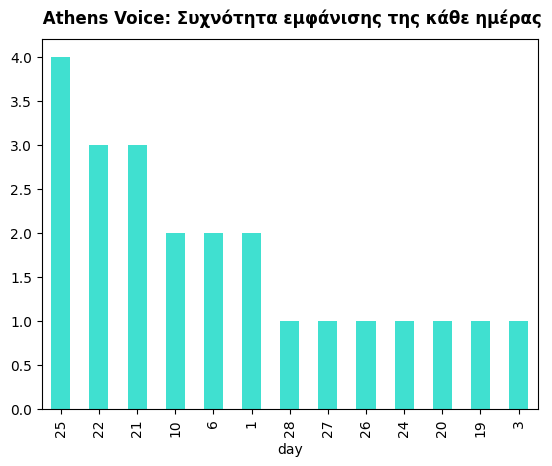

In [18]:
article_df_feb['day'].value_counts().plot(kind='bar', color='turquoise')

plt.title(' Athens Voice: Συχνότητα εμφάνισης της κάθε ημέρας', y=1.02, fontweight='bold')

Text(0.5, 1.02, ' Athens Voice: Αριθμός των άρθρων τον Φεβρουάριο')

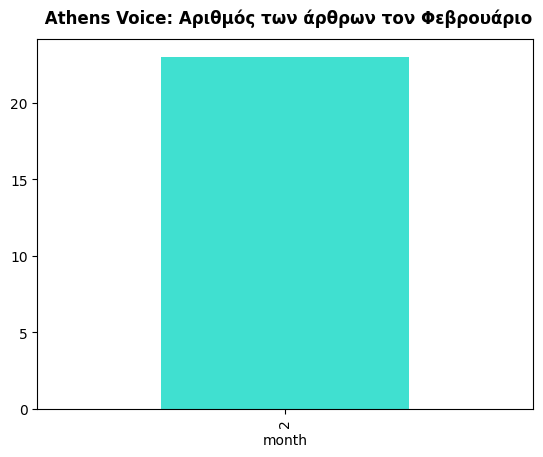

In [17]:
article_df_feb['month'].value_counts().plot(kind='bar' , color='turquoise')
plt.title(' Athens Voice: Αριθμός των άρθρων τον Φεβρουάριο', y=1.02, fontweight='bold')

In [13]:
import seaborn as sns
import numpy as np
import spacy
import matplotlib.pyplot as plt

In [14]:
!python -m spacy download el_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 64.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [15]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


In [16]:
nlp = spacy.load('el_core_news_sm')


In [21]:
text = article_df_feb['full_text'].str.cat(sep = ' ')

In [22]:
full_doc= nlp(text)

In [23]:
full_doc[:200]

Το «βουβό» έγκλημα γίνεται για πρώτη φορά «ορατό», σε όλες τις διαστάσεις της χυδαιότητας, του κυνισμού, του αυταρχισμού, του εκβιασμού Σχόλιο για την ελληνική εκδοχή του MeToo Το κουβάρι άρχισε να ξετυλίγεται με τις θαρραλέες καταγγελίες της Μπεκατώρου για τον βιασμό της και κορυφώνεται μέχρι σήμερα τουλάχιστον με το θρίλερ της υπόθεσης Λιγνάδη, για κατηγορίες παιδοφιλίας και σεξουαλικής κακοποίησης. Ενδιάμεσα ακούσαμε δεκάδες καταγγελίες με όλες οι δυνατές αποχρώσεις προσβολής της ανθρώπινης προσωπικότητας, από εκβιασμούς, εργασιακούς εκφοβισμούς, βιοπραγίες, ηδονοβλεπτικές αυτοϊκανοποιήσεις, αστείες τηλεφωνικές ορέξεις από ανθρώπους άλλες φορές υπεράνω υποψίας και άλλες φορές από «κωμικά» υποκείμενα, που μέσα στη σοβαρότητα των πραγμάτων αναδύουν παράπλευρες προεκτάσεις γκροτέσκων σκηνών. Το γελοίο μπερδεύεται πικρά με το αδίκημα. Για όσους γνωρίζουν την πρόσφατη κοινωνική ιστορία της νεοελληνικής κοινωνίας και έχουν διατρέξει κείμενα της λογοτεχνίας, αυτές οι φιγούρες δεν είναι άγν

In [24]:
lemmatized_text = ' '.join(token.lemma_ for token in full_doc)

In [25]:
lemmatized_text[:1000]

'ο « βουβό » έγκλημα γίνομαι για πρώτος φορά « ορατό » , σε όλος ο διαστάση ο χυδαιότητα , ο κυνισμός , ο αυταρχισμός , ο εκβιασμός σχόλιο για ο ελληνικός εκδοχή ο MeToo ο κουβάρι αρχίζω να ξετυλίγω με ο θαρραλέος καταγγελία ο Μπεκατώρος για ο βιασμός μου και κορυφώνω μέχρι σήμερα τουλάχιστο με ο θρίλερ ο υπόθεση Λιγνάδη , για κατηγορία παιδοφιλία και σεξουαλικός κακοποίηση . ενδιάμεσα ακούω δεκάδα καταγγελία με όλος ο δυνατός αποχρώσεις προσβολή ο ανθρώπινος προσωπικότητα , από εκβιασμός , εργασιακός εκφοβισμός , βιοπραγία , ηδονοβλεπτικός αυτοϊκανοποιήσεις , αστεία τηλεφωνικός ορέξεις από άνθρωπος άλλος φορά υπεράνω υποψία και άλλος φορά από « κωμικός » υποκείμενος , που μέσα σε ο σοβαρότητα ο πραγμάτων αναδύω παράπλευρος προεκτάσεις γκροτέσκων σκηνών . ο γελοίος μπερδεύεμαι πικρά με ο αδίκημα . για όσος γνωρίζω ο πρόσφατος κοινωνικός ιστορία ο νεοελληνικός κοινωνία και έχω διατρέττω κείμενο ο λογοτεχνία , αυτός ο φιγούρα δεν είμαι άγνωστης . είμαι ο ομώνυμος ενίοτε εγκληματικός « ήρ

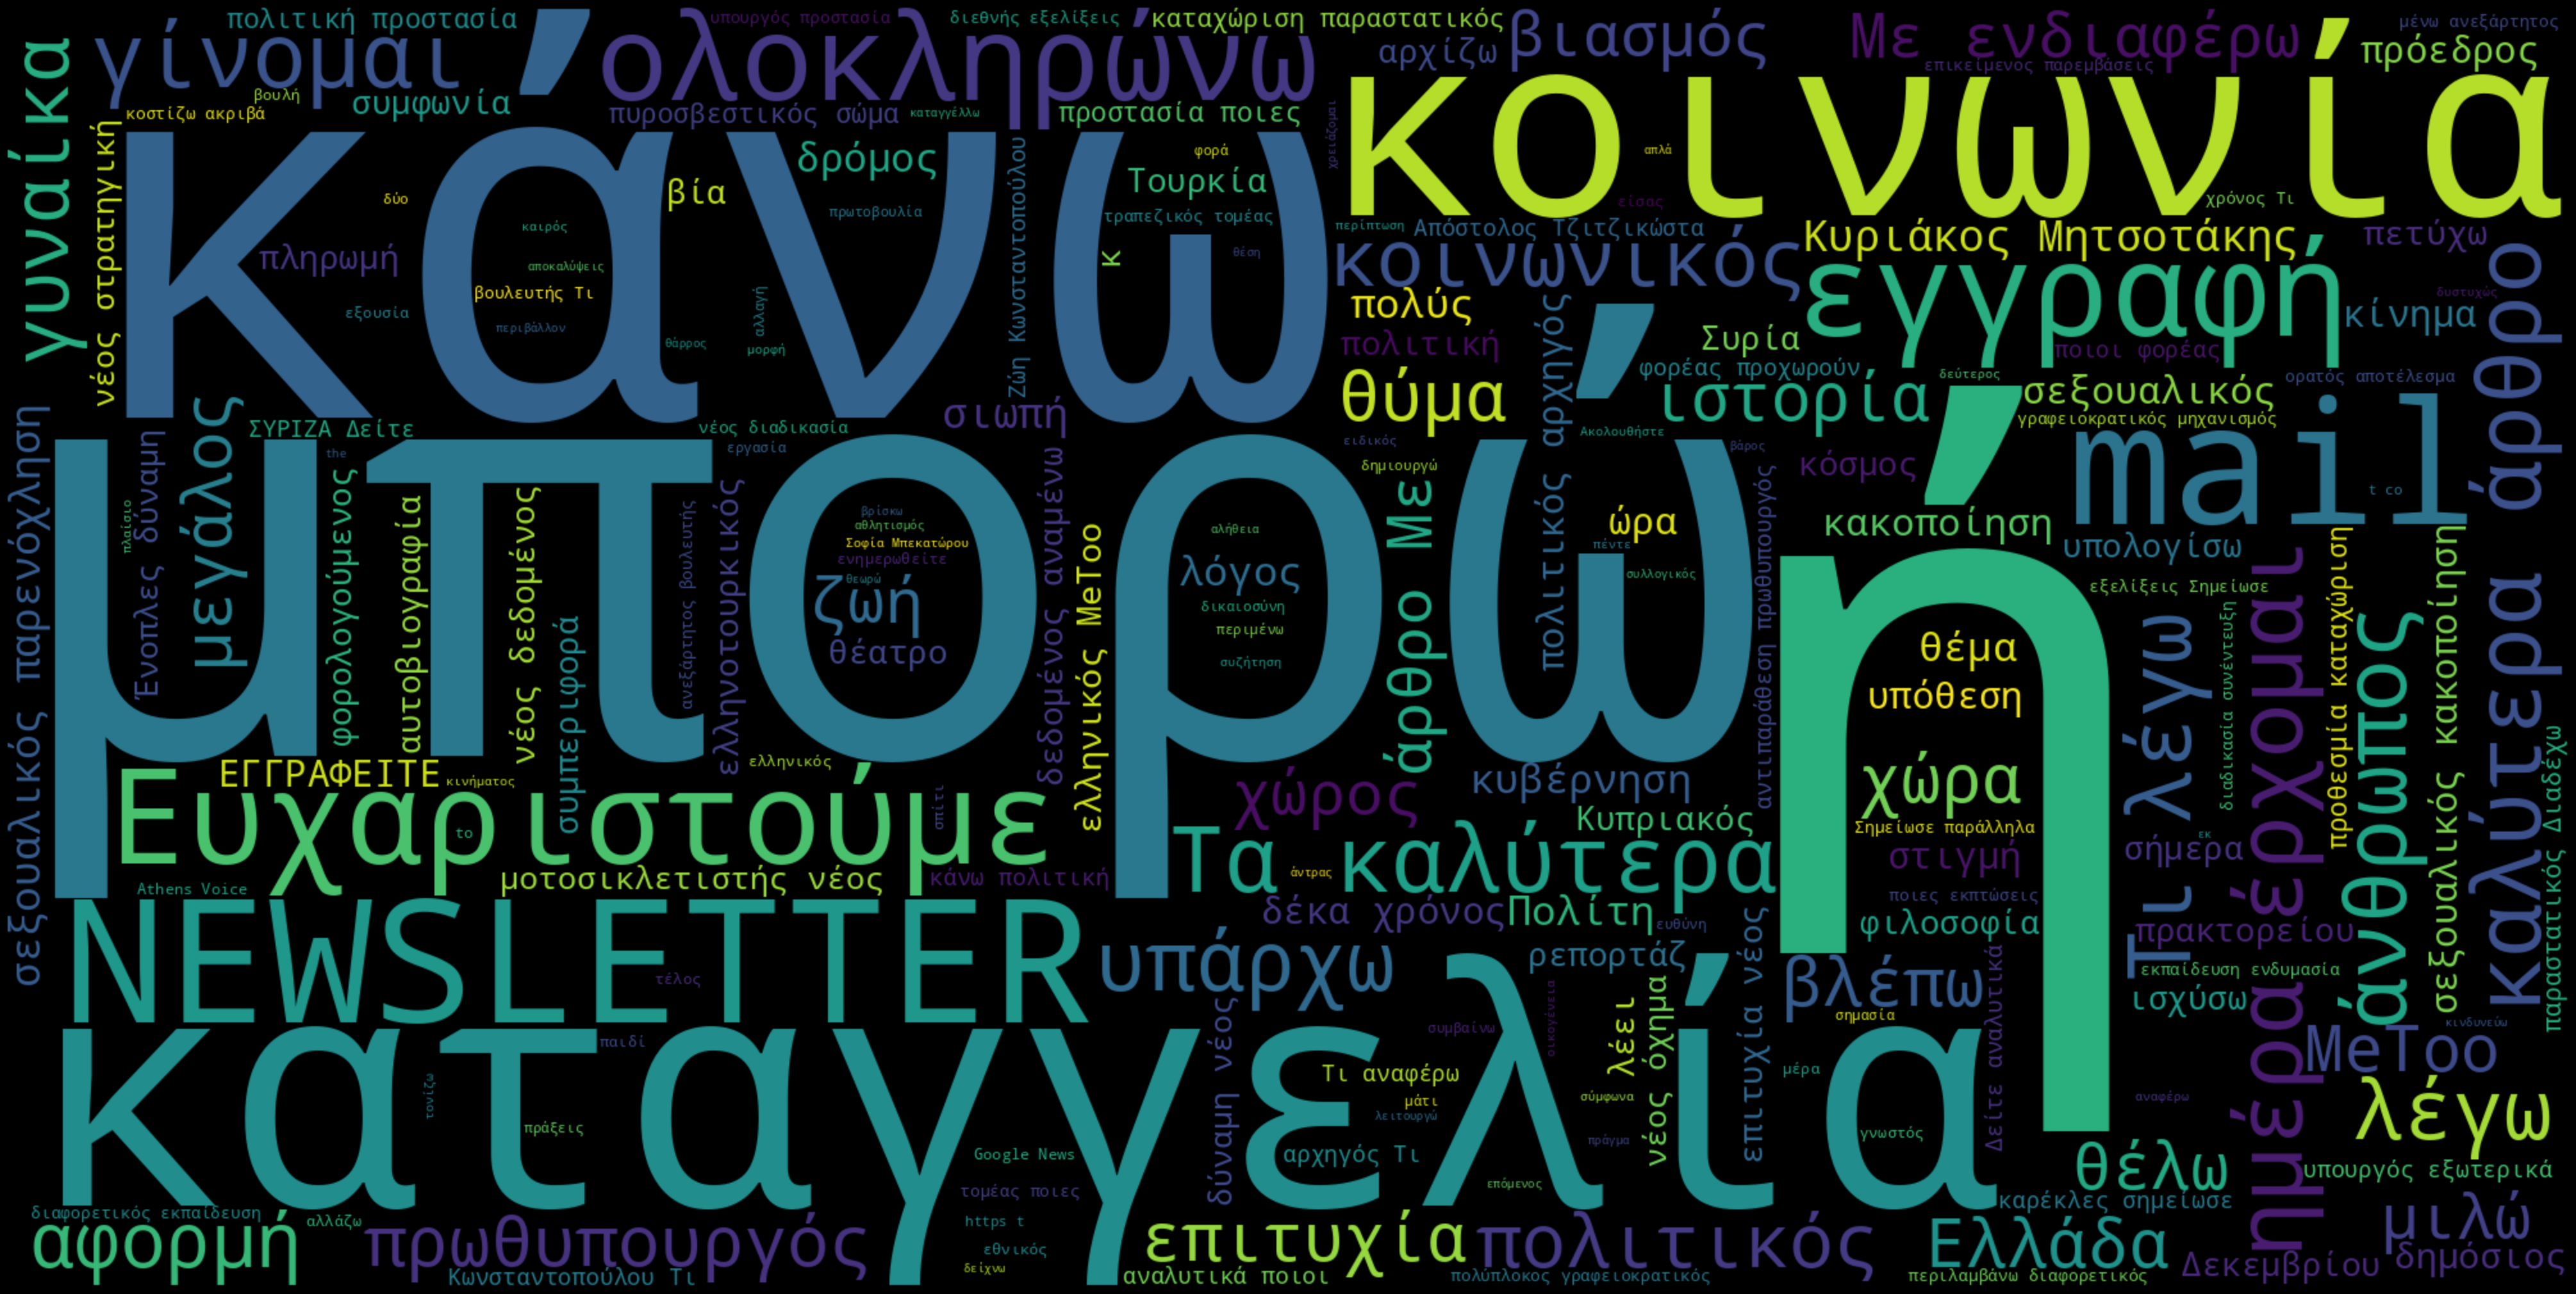

In [26]:
wordcloud2 = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(lemmatized_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud2, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [27]:
print(article_df_feb.index)

RangeIndex(start=0, stop=23, step=1)


In [30]:
doc = nlp(article_df_feb['full_text'][0])

In [31]:
for token in doc:
    print(token, token.lemma_)

Το ο
« «
βουβό βουβό
» »
έγκλημα έγκλημα
γίνεται γίνομαι
για για
πρώτη πρώτος
φορά φορά
« «
ορατό ορατό
» »
, ,
σε σε
όλες όλος
τις ο
διαστάσεις διαστάση
της ο
χυδαιότητας χυδαιότητα
, ,
του ο
κυνισμού κυνισμός
, ,
του ο
αυταρχισμού αυταρχισμός
, ,
του ο
εκβιασμού εκβιασμός
Σχόλιο σχόλιο
για για
την ο
ελληνική ελληνικός
εκδοχή εκδοχή
του ο
MeToo MeToo
Το ο
κουβάρι κουβάρι
άρχισε αρχίζω
να να
ξετυλίγεται ξετυλίγω
με με
τις ο
θαρραλέες θαρραλέος
καταγγελίες καταγγελία
της ο
Μπεκατώρου Μπεκατώρος
για για
τον ο
βιασμό βιασμός
της μου
και και
κορυφώνεται κορυφώνω
μέχρι μέχρι
σήμερα σήμερα
τουλάχιστον τουλάχιστο
με με
το ο
θρίλερ θρίλερ
της ο
υπόθεσης υπόθεση
Λιγνάδη Λιγνάδη
, ,
για για
κατηγορίες κατηγορία
παιδοφιλίας παιδοφιλία
και και
σεξουαλικής σεξουαλικός
κακοποίησης κακοποίηση
. .
Ενδιάμεσα ενδιάμεσα
ακούσαμε ακούω
δεκάδες δεκάδα
καταγγελίες καταγγελία
με με
όλες όλος
οι ο
δυνατές δυνατός
αποχρώσεις αποχρώσεις
προσβολής προσβολή
της ο
ανθρώπινης ανθρώπινος
προσωπικότητας προσωπικότητα

In [32]:
' '.join(token.lemma_ for token in doc)

'ο « βουβό » έγκλημα γίνομαι για πρώτος φορά « ορατό » , σε όλος ο διαστάση ο χυδαιότητα , ο κυνισμός , ο αυταρχισμός , ο εκβιασμός σχόλιο για ο ελληνικός εκδοχή ο MeToo ο κουβάρι αρχίζω να ξετυλίγω με ο θαρραλέος καταγγελία ο Μπεκατώρος για ο βιασμός μου και κορυφώνω μέχρι σήμερα τουλάχιστο με ο θρίλερ ο υπόθεση Λιγνάδη , για κατηγορία παιδοφιλία και σεξουαλικός κακοποίηση . ενδιάμεσα ακούω δεκάδα καταγγελία με όλος ο δυνατός αποχρώσεις προσβολή ο ανθρώπινος προσωπικότητα , από εκβιασμός , εργασιακός εκφοβισμός , βιοπραγία , ηδονοβλεπτικός αυτοϊκανοποιήσεις , αστεία τηλεφωνικός ορέξεις από άνθρωπος άλλος φορά υπεράνω υποψία και άλλος φορά από « κωμικός » υποκείμενος , που μέσα σε ο σοβαρότητα ο πραγμάτων αναδύω παράπλευρος προεκτάσεις γκροτέσκων σκηνών . ο γελοίος μπερδεύεμαι πικρά με ο αδίκημα . για όσος γνωρίζω ο πρόσφατος κοινωνικός ιστορία ο νεοελληνικός κοινωνία και έχω διατρέττω κείμενο ο λογοτεχνία , αυτός ο φιγούρα δεν είμαι άγνωστης . είμαι ο ομώνυμος ενίοτε εγκληματικός « ήρ

In [33]:
text

"Το «βουβό» έγκλημα γίνεται για πρώτη φορά «ορατό», σε όλες τις διαστάσεις της χυδαιότητας, του κυνισμού, του αυταρχισμού, του εκβιασμού Σχόλιο για την ελληνική εκδοχή του MeToo Το κουβάρι άρχισε να ξετυλίγεται με τις θαρραλέες καταγγελίες της Μπεκατώρου για τον βιασμό της και κορυφώνεται μέχρι σήμερα τουλάχιστον με το θρίλερ της υπόθεσης Λιγνάδη, για κατηγορίες παιδοφιλίας και σεξουαλικής κακοποίησης. Ενδιάμεσα ακούσαμε δεκάδες καταγγελίες με όλες οι δυνατές αποχρώσεις προσβολής της ανθρώπινης προσωπικότητας, από εκβιασμούς, εργασιακούς εκφοβισμούς, βιοπραγίες, ηδονοβλεπτικές αυτοϊκανοποιήσεις, αστείες τηλεφωνικές ορέξεις από ανθρώπους άλλες φορές υπεράνω υποψίας και άλλες φορές από «κωμικά» υποκείμενα, που μέσα στη σοβαρότητα των πραγμάτων αναδύουν παράπλευρες προεκτάσεις γκροτέσκων σκηνών. Το γελοίο μπερδεύεται πικρά με το αδίκημα. Για όσους γνωρίζουν την πρόσφατη κοινωνική ιστορία της νεοελληνικής κοινωνίας και έχουν διατρέξει κείμενα της λογοτεχνίας, αυτές οι φιγούρες δεν είναι άγ

In [34]:
full_doc = nlp(text)

In [35]:
clear_text = ' '.join(token.lemma_ for token in full_doc)

In [36]:
clear_text[200:400]

' ο θαρραλέος καταγγελία ο Μπεκατώρος για ο βιασμός μου και κορυφώνω μέχρι σήμερα τουλάχιστο με ο θρίλερ ο υπόθεση Λιγνάδη , για κατηγορία παιδοφιλία και σεξουαλικός κακοποίηση . ενδιάμεσα ακούω δεκάδα'

In [37]:
list(nlp.Defaults.stop_words)[0:20]

['όλους',
 'δεν',
 'μπρος',
 'κατόπιν',
 'εκείνα',
 'κατ',
 'μείον',
 'ιδίου',
 'μη',
 'έτερης',
 'αρκετά',
 'παντού',
 'εμπρός',
 'λοιπά',
 'ος',
 'πως',
 'έκαστα',
 'κατά',
 'κάμποσα',
 'τρίτη']

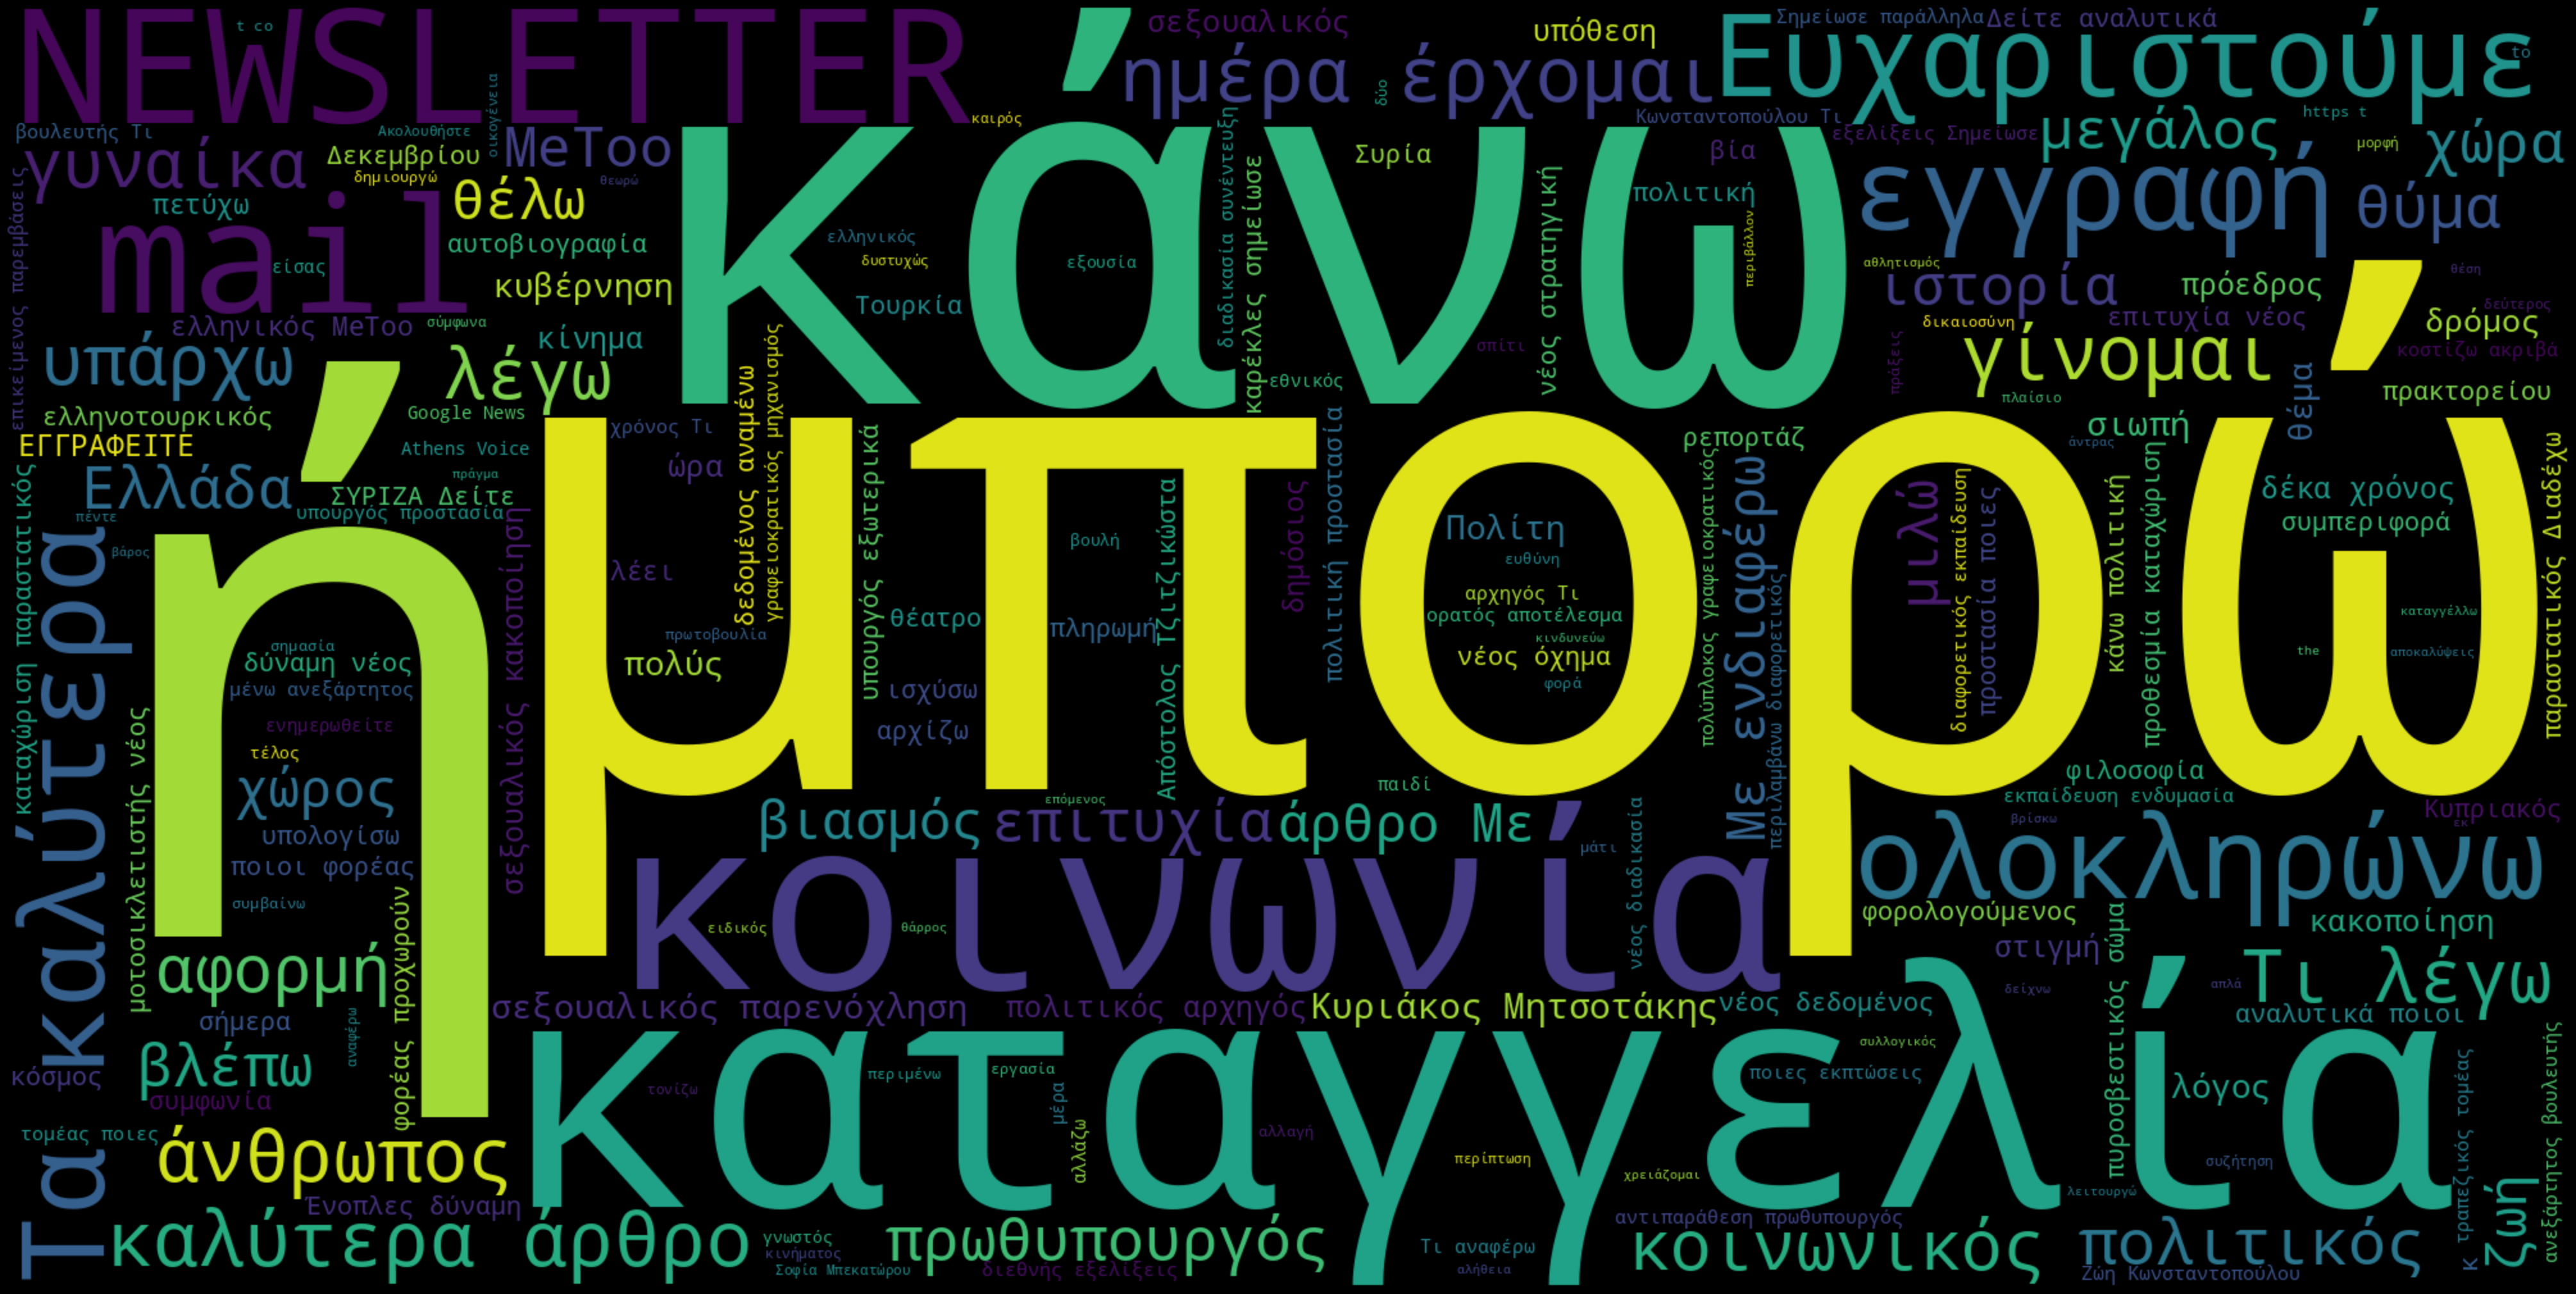

In [38]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(clear_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

In [40]:
cv = CountVectorizer()

In [42]:
count_vector = cv.fit_transform(article_df_feb['full_text'])

In [43]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

000  10  100  11η  13  14  15χρονο  16  1635  1821  ...  ύποπτοι  ύπουλο  \
0    0   0    0    0   1   0        0   0     0     0  ...        0       0   
1    0   0    0    0   0   0        0   0     0     0  ...        0       0   
2    0   0    0    0   0   0        0   0     1     0  ...        0       0   
3    0   0    0    0   0   0        0   0     0     0  ...        0       0   
4    0   0    0    0   0   0        0   0     1     0  ...        0       0   

   ύστερα  ύστερη  ύφος  ύψιστη  ώρα  ώρες  ώσπου  ώστε  
0       0       0     0       0    0     0      0     0  
1       0       0     0       0    0     0      0     1  
2       0       0     0       0    1     1      0     0  
3       0       0     0       0    0     1      0     0  
4       0       0     0       0    1     1      0     1  

[5 rows x 4521 columns]

In [44]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words))

In [45]:
count_vector = cv.fit_transform(article_df_feb['full_text'])

In [46]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

000  10  100  11η  13  14  15χρονο  16  1635  1821  ...  όφελος  ύμνος  \
0    0   0    0    0   1   0        0   0     0     0  ...       0      0   
1    0   0    0    0   0   0        0   0     0     0  ...       0      0   
2    0   0    0    0   0   0        0   0     1     0  ...       0      0   
3    0   0    0    0   0   0        0   0     0     0  ...       0      0   
4    0   0    0    0   0   0        0   0     1     0  ...       0      0   

   ύπαρξη  ύποπτοι  ύπουλο  ύστερη  ύφος  ύψιστη  ώρα  ώρες  
0       0        0       0       0     0       0    0     0  
1       0        0       0       0     0       0    0     0  
2       0        0       0       0     0       0    1     1  
3       0        0       0       0     0       0    0     1  
4       0        0       0       0     0       0    1     1  

[5 rows x 4194 columns]

In [47]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words), min_df=0.01, max_df=0.95)

In [48]:
count_vector = cv.fit_transform(article_df_feb['full_text'])

In [49]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

000  10  100  11η  13  14  15χρονο  16  1635  1821  ...  όφελος  ύμνος  \
0    0   0    0    0   1   0        0   0     0     0  ...       0      0   
1    0   0    0    0   0   0        0   0     0     0  ...       0      0   
2    0   0    0    0   0   0        0   0     1     0  ...       0      0   
3    0   0    0    0   0   0        0   0     0     0  ...       0      0   
4    0   0    0    0   0   0        0   0     1     0  ...       0      0   

   ύπαρξη  ύποπτοι  ύπουλο  ύστερη  ύφος  ύψιστη  ώρα  ώρες  
0       0        0       0       0     0       0    0     0  
1       0        0       0       0     0       0    0     0  
2       0        0       0       0     0       0    1     1  
3       0        0       0       0     0       0    0     1  
4       0        0       0       0     0       0    1     1  

[5 rows x 4194 columns]

In [50]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20)
count_vector = cv.fit_transform(article_df_feb['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

mail  metoo  newsletter  tα  tι  άρθρα  έρχονται  αφορμή  είπε  εγγραφή  \
0     2      2           2   2   4      3         2       2     3        2   
1     2      4           2   2   4      3         2       3     3        2   
2     2      0           2   2   0      3         2       0     0        2   
3     2      2           2   2   4      3         2       2     8        2   
4     2      0           2   2   0      3         3       0     0        2   

   επιτυχία  ευχαριστούμε  ημέρας  καλύτερα  κι  νέα  ολοκληρώθηκε  ποιες  \
0         2             2       2         2   0    3             2      2   
1         2             2       2         2   0    3             2      2   
2         2             2       2         2   1    2             2      1   
3         2             2       2         2   1    3             3      2   
4         2             2       2         2   1    1             2      1   

   προστασίας  χρόνια  
0           2       1  
1           2       1  
2           0       0  
3           2       1  
4           0       0

In [51]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, token_pattern = '\\bκυβ[α-ωά-ώ]*\\b')
count_vector = cv.fit_transform(article_df_feb['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

κυβέρνηση  κυβέρνησης  κυβερνητική  κυβερνητικού
0          0           0            0             0
1          0           0            0             0
2          2           0            0             0
3          0           1            0             0
4          1           0            0             0

In [52]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, ngram_range=(2, 2))
count_vector = cv.fit_transform(article_df_feb['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

20 200  200 άρθρα  mail ευχαριστούμε  mε ενδιαφέρει  newsletter tα  \
0       1          1                  2              1              2   
1       1          1                  2              1              2   
2       1          1                  2              1              2   
3       1          1                  2              1              2   
4       1          1                  2              1              2   

   tα καλύτερα  tι είπε  άρθρα mε  άρθρα ημέρας  έρχονται mail  δέκα χρόνια  \
0            2        3         1             2              2            1   
1            2        3         1             2              2            1   
2            2        0         1             2              2            0   
3            2        3         1             2              2            1   
4            2        0         1             2              2            0   

   δει 20  εγγραφή ολοκληρώθηκε  εγγραφειτε newsletter  ενδιαφέρει newsletter  \
0       1                     2                      1                      1   
1       1                     2                      1                      1   
2       1                     2                      1                      1   
3       1                     2                      1                      1   
4       1                     2                      1                      1   

   ευχαριστούμε εγγραφή  ημέρας έρχονται  καλύτερα άρθρα  κυριάκος μητσοτάκης  \
0                     2                2               2                    0   
1                     2                2               2                    0   
2                     2                2               2                    1   
3                     2                2               2                    7   
4                     2                2               2                    3   

   ολοκληρώθηκε επιτυχία  
0                      2  
1                      2  
2                      2  
3                      2  
4                      2

In [53]:
results.sum(axis =0).sort_values(ascending = False)

ολοκληρώθηκε επιτυχία    42
mail ευχαριστούμε        42
newsletter tα            42
tα καλύτερα              42
καλύτερα άρθρα           42
άρθρα ημέρας             42
έρχονται mail            42
ημέρας έρχονται          42
ευχαριστούμε εγγραφή     42
εγγραφή ολοκληρώθηκε     42
tι είπε                  39
ενδιαφέρει newsletter    21
κυριάκος μητσοτάκης      21
20 200                   21
εγγραφειτε newsletter    21
δει 20                   21
200 άρθρα                21
άρθρα mε                 21
mε ενδιαφέρει            21
δέκα χρόνια              16
dtype: int64

In [54]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()

ολοκληρώθηκε επιτυχία    42
mail ευχαριστούμε        42
newsletter tα            42
tα καλύτερα              42
καλύτερα άρθρα           42
dtype: int64

In [56]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20,
                     vocabulary = ['κακοποίηση', 'τέρας', 'υποστήριξη', 'θύμα', 'παραβίαση δικαιωμάτων'])
count_vector = cv.fit_transform(article_df_feb['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

κακοποίηση  τέρας  υποστήριξη  θύμα  παραβίαση δικαιωμάτων
0           0      0           0     1                      0
1           1      0           0     0                      0
2           0      0           0     0                      0
3           0      0           0     2                      0
4           0      0           0     0                      0

from matplotlib import pyplot as plt
_df_0['κακοποίηση'].plot(kind='hist', bins=20, title='κακοποίηση')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['θύμα'].plot(kind='hist', bins=20, title='θύμα')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='κακοποίηση', y='θύμα', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['τέρας']
  ys = series['κακοποίηση']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('τέρας', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('τέρας')
_ = plt.ylabel('κακοποίηση')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['τέρας']
  ys = series['θύμα']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('τέρας', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('τέρας')
_ = plt.ylabel('θύμα')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['τέρας']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'τέρας'}, axis=1)
              .sort_values('τέρας', ascending=True))
  xs = counted['τέρας']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('τέρας', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('τέρας')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['υποστήριξη']
  ys = series['κακοποίηση']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('υποστήριξη', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('υποστήριξη')
_ = plt.ylabel('κακοποίηση')

from matplotlib import pyplot as plt
_df_7['κακοποίηση'].plot(kind='line', figsize=(8, 4), title='κακοποίηση')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['θύμα'].plot(kind='line', figsize=(8, 4), title='θύμα')
plt.gca().spines[['top', 'right']].set_visible(False)

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(article_df_feb['full_text'])

In [59]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
results.head()

1635        20       200      2021        23        70    athens   au  \
0  0.000000  0.028051  0.028051  0.000000  0.037934  0.000000  0.000000  0.0   
1  0.000000  0.039537  0.039537  0.000000  0.053467  0.000000  0.000000  0.0   
2  0.057803  0.026331  0.026331  0.050835  0.000000  0.057803  0.039074  0.0   
3  0.000000  0.020663  0.020663  0.000000  0.027943  0.000000  0.030663  0.0   
4  0.062463  0.028453  0.028453  0.054933  0.000000  0.062463  0.042224  0.0   

         co       com  ...  χρειάζεται    χρόνια     χρόνο   χυδαίες  \
0  0.000000  0.000000  ...         0.0  0.033229  0.000000  0.000000   
1  0.000000  0.000000  ...         0.0  0.046836  0.000000  0.000000   
2  0.124439  0.124439  ...         0.0  0.000000  0.057803  0.054069   
3  0.000000  0.000000  ...         0.0  0.024477  0.000000  0.000000   
4  0.134471  0.134471  ...         0.0  0.000000  0.000000  0.058428   

       χώρα    χώρας      χώρο  χώρους       ώρα      ώρες  
0  0.057601  0.00000  0.043692     0.0  0.000000  0.000000  
1  0.000000  0.00000  0.000000     0.0  0.000000  0.000000  
2  0.000000  0.00000  0.000000     0.0  0.054069  0.050835  
3  0.084860  0.04243  0.032184     0.0  0.000000  0.039892  
4  0.000000  0.00000  0.000000     0.0  0.058428  0.054933  

[5 rows x 500 columns]

In [60]:
from sklearn.metrics.pairwise import cosine_similarity

In [61]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

<Axes: >

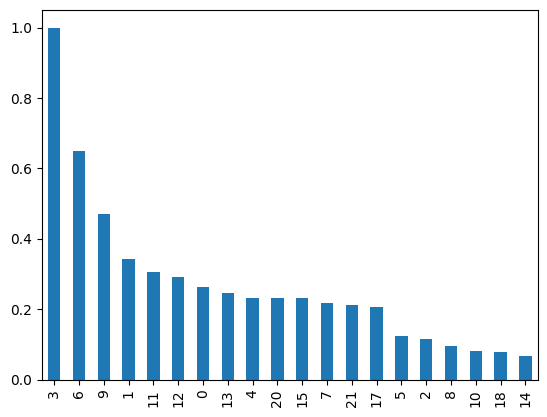

In [62]:
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar')

In [63]:
article_df_feb['full_text'].iloc[3]

'Η δευτερολογία του πρωθυπουργού στη Βουλή Κυριάκος Μητσοτάκης προς Τσίπρα: «Ρίχνετε λάσπη, κανένα μυστικό δεν με συνδέει με την κυρία Μενδώνη». Ολοκληρώθηκε η δευτερολογία του πρωθυπουργού, Κυριάκου Μητσοτάκη,\xa0στη συζήτηση που γίνεται στη Βουλή για το ελληνικό\xa0#metoo,\xa0«Ρίχνετε λάσπη, κανένα ένοχο -δήθεν- μυστικό δεν με συνδέει με την κυρία Μενδώνη» είπε ο Κυριάκος Μητσοτάκης απευθυνόμενος στον Αλέξη Τσίπρα. Παράλληλα, κατηγόρησε τον ΣΥΡΙΖΑ και συγκεκριμένα τους βουλευτές Παύλο Πολάκη και Σουλτάνα Ελευθεριάδου για υποκίνηση χυδαίων υπονοούμενων τα οποία στη συνέχεια αναπαράγονταν από ανώνυμα τρολς του διαδικτύου.\xa0 «Θα επαναλάβω το ερώτημα, που δεν απαντήθηκε από κανένα πολιτικό αρχηγό: γιατί το metoo εμφανίστηκε στην χώρα μας τώρα και όχι προ 4 ετών;» είπε ξεκινώντας την δευτερολογία του στη Βουλή ο Κυριάκος Μητσοτάκης, στο πλαίσιο της συζήτησης με θέμα την ποιότητα της Δημοκρατίας και του Δημοσίου Διαλόγου. «Γιατί η Σοφία Μπεκατώρου επέλεξε να μιλήσει σε ημερίδα του Υπουργ

In [64]:
article_df_feb['full_text'].iloc[0]

'Το «βουβό» έγκλημα γίνεται για πρώτη φορά «ορατό», σε όλες τις διαστάσεις της χυδαιότητας, του κυνισμού, του αυταρχισμού, του εκβιασμού Σχόλιο για την ελληνική εκδοχή του MeToo Το κουβάρι άρχισε να ξετυλίγεται με τις θαρραλέες καταγγελίες της Μπεκατώρου για τον βιασμό της και κορυφώνεται μέχρι σήμερα τουλάχιστον με το θρίλερ της υπόθεσης Λιγνάδη, για κατηγορίες παιδοφιλίας και σεξουαλικής κακοποίησης. Ενδιάμεσα ακούσαμε δεκάδες καταγγελίες με όλες οι δυνατές αποχρώσεις προσβολής της ανθρώπινης προσωπικότητας, από εκβιασμούς, εργασιακούς εκφοβισμούς, βιοπραγίες, ηδονοβλεπτικές αυτοϊκανοποιήσεις, αστείες τηλεφωνικές ορέξεις από ανθρώπους άλλες φορές υπεράνω υποψίας και άλλες φορές από «κωμικά» υποκείμενα, που μέσα στη σοβαρότητα των πραγμάτων αναδύουν παράπλευρες προεκτάσεις γκροτέσκων σκηνών. Το γελοίο μπερδεύεται πικρά με το αδίκημα. Για όσους γνωρίζουν την πρόσφατη κοινωνική ιστορία της νεοελληνικής κοινωνίας και έχουν διατρέξει κείμενα της λογοτεχνίας, αυτές οι φιγούρες δεν είναι άγ

In [65]:
arr = cosine_similarity(tfidf_matrix_train[0:10], tfidf_matrix_train[0:10])

<Axes: title={'center': 'Βαθμός ομοιότητας των 10 πρώτων άρθρων'}>

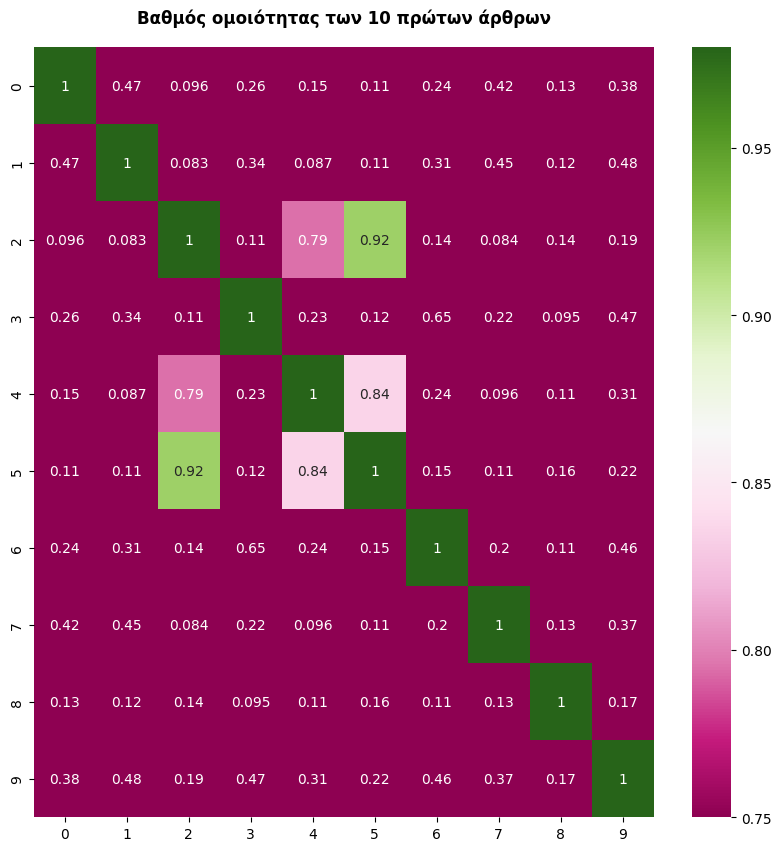

In [66]:
plt.figure(figsize=(10, 10))
# annot = True to print the values inside the square
plt.title('Βαθμός ομοιότητας των 10 πρώτων άρθρων', y=1.02, fontweight='bold') # το y ορίζει την απόσταση του τίτλου από το γράφημα
sns.heatmap(data=arr, annot=True, vmin=0.75, vmax=0.98, cmap="PiYG")

#plt.savefig('<το path και το όνομα του αρχείου>.png')

In [67]:
!python -m spacy download el_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 58.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [68]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [69]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [70]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0

In [71]:
emolex_df.tail()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
13166     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   1.0   
13167  κροκος αυγου       0.0       0.0    0.0           0.0      0.0   0.0   
13168      νεοτερος       1.0       0.0    0.0           0.0      0.0   0.0   
13169       ζεφυρος       0.0       0.0    0.0           0.0      0.0   0.0   
13170          ζουμ       0.0       0.0    0.0           0.0      0.0   0.0   

       Joy  Sadness  Surprise  Trust  
13166  0.0      0.0       1.0    0.0  
13167  0.0      0.0       0.0    0.0  
13168  0.0      0.0       0.0    0.0  
13169  0.0      0.0       0.0    0.0  
13170  0.0      0.0       0.0    0.0

In [72]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [73]:
emolex_df.tail()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
13156     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   1.0   
13157  κροκος αυγου       0.0       0.0    0.0           0.0      0.0   0.0   
13158      νεοτερος       1.0       0.0    0.0           0.0      0.0   0.0   
13159       ζεφυρος       0.0       0.0    0.0           0.0      0.0   0.0   
13160          ζουμ       0.0       0.0    0.0           0.0      0.0   0.0   

       Joy  Sadness  Surprise  Trust  
13156  0.0      0.0       1.0    0.0  
13157  0.0      0.0       0.0    0.0  
13158  0.0      0.0       0.0    0.0  
13159  0.0      0.0       0.0    0.0  
13160  0.0      0.0       0.0    0.0

In [74]:
len(article_df_feb)

23

In [75]:
article_df_feb.head(3)

title  \
0         Το MeToo και το θέατρο του παραλόγου   
1                  Και ύστερα ήρθαν τα κόμματα   
2  Η Σοφία Μπεκατώρου στηρίζει το #metoogreece   

                                           full_text                  author  \
0  Το «βουβό» έγκλημα γίνεται για πρώτη φορά «ορα...  Σταύρος Κωνσταντινίδης   
1  Το ελληνικό #MeToo δοκιμάζεται Σχόλιο για το ε...    Γιώργος Παναγιωτάκης   
2  Αναδημοσίευσε την ανάρτηση του Άκη Σκέρτσου Η ...                Newsroom   

                   date                  datetime  year  month  day  hour  
0  2021-02-28T17:22:00Z 2021-02-28 17:22:00+00:00  2021      2   28    17  
1  2021-02-27T09:29:00Z 2021-02-27 09:29:00+00:00  2021      2   27     9  
2  2021-02-26T11:14:48Z 2021-02-26 11:14:48+00:00  2021      2   26    11

In [76]:
article_df_fa = article_df_feb[['date','full_text','year',	'month'	,'day',	'hour' ]]
article_df_fa = article_df_fa.rename(columns={'full_text': 'text'} )

In [77]:
article_df_fa = article_df_fa.rename(columns={'time': 'date'} )

In [78]:
article_df_fa.tail()

date                                               text  \
18  2021-02-06T18:14:00Z  Έκανε λόγο για «οντισιόν- παγίδα» Νέα καταγγελ...   
19  2021-02-06T09:43:00Z  Η γνωστή τραγουδίστρια μιλάει για πρώτη φορά μ...   
20  2021-02-03T13:41:00Z  Επιτέλους, γυναίκες και άνδρες άρχισαν να μιλο...   
21  2021-02-01T09:31:00Z  Υπάρχουν αρκετοί που έχουν μπερδευτεί επειδή ε...   
22  2021-02-01T08:12:23Z  Ένα μπεστ-σέλερ πυροδοτεί ένα κίνημα Πώς το βι...   

    year  month  day  hour  
18  2021      2    6    18  
19  2021      2    6     9  
20  2021      2    3    13  
21  2021      2    1     9  
22  2021      2    1     8

In [79]:
article_df_fa.dtypes

date     object
text     object
year      int32
month     int32
day       int32
hour      int32
dtype: object

In [80]:
article_df_fa['date'] = pd.to_datetime(article_df_fa['date'])

In [81]:
article_df_fa.dtypes

date     datetime64[ns, UTC]
text                  object
year                   int32
month                  int32
day                    int32
hour                   int32
dtype: object

In [82]:
article_df_fa.head()

date  \
0 2021-02-28 17:22:00+00:00   
1 2021-02-27 09:29:00+00:00   
2 2021-02-26 11:14:48+00:00   
3 2021-02-25 12:35:00+00:00   
4 2021-02-25 10:50:00+00:00   

                                                text  year  month  day  hour  
0  Το «βουβό» έγκλημα γίνεται για πρώτη φορά «ορα...  2021      2   28    17  
1  Το ελληνικό #MeToo δοκιμάζεται Σχόλιο για το ε...  2021      2   27     9  
2  Αναδημοσίευσε την ανάρτηση του Άκη Σκέρτσου Η ...  2021      2   26    11  
3  Η δευτερολογία του πρωθυπουργού στη Βουλή Κυρι...  2021      2   25    12  
4  Άνοιξε η διαδικτυακή πλατφόρμα metoogreece.gr ...  2021      2   25    10

In [83]:
emolex_df['word'].head(3)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [84]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [85]:
matrix = vec.fit_transform(article_df_fa['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

αφεση  ενορκη βεβαιωση  εχοντας  εχω  οριο  ορμος  υδρα  αγια τραπεζα  \
0      0                0        0    0     0      0     0             0   
1      0                0        0    0     0      0     0             0   
2      0                0        0    0     0      0     0             0   
3      0                0        0    0     0      0     0             0   
4      0                0        0    0     0      0     0             0   

   αμην  απατσι  ...  κλητηριο ενταλμα  κατειργασμενος  μαγια  κιτρινο  \
0     0       0  ...                 0               0      0        0   
1     0       0  ...                 0               0      0        0   
2     0       0  ...                 0               0      0        0   
3     0       0  ...                 0               0      0        0   
4     0       0  ...                 0               0      0        0   

   κιτρινιζω  ουρλιασμα  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ  
0          0          0             0         0        0     0  
1          0          0             0         0        0     0  
2          0          0             0         0        0     0  
3          0          0             0         0        0     0  
4          0          0             0         0        0     0  

[5 rows x 13161 columns]

In [86]:
wordcount_df.shape

(23, 13161)

In [87]:
emolex_df.head()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0

In [88]:
emolex_df[emolex_df.Anger == 1].tail()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
13094      διεξοδος       0.0       0.0    1.0           0.0      0.0   0.0   
13096        ζωυφια       0.0       1.0    1.0           0.0      1.0   1.0   
13100    θυματοποιω       0.0       1.0    1.0           0.0      1.0   1.0   
13128  αποτυχημενος       0.0       1.0    1.0           0.0      1.0   0.0   
13156     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   1.0   

       Joy  Sadness  Surprise  Trust  
13094  0.0      0.0       0.0    0.0  
13096  0.0      0.0       0.0    0.0  
13100  0.0      1.0       1.0    0.0  
13128  0.0      0.0       0.0    0.0  
13156  0.0      0.0       1.0    0.0

In [89]:
# Φτιάξε μια λίστα με positive words
positive_words = emolex_df[emolex_df.Positive == 1]['word']

# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']

# Φτιάξε μια λίστα με anger words
angry_words = emolex_df[emolex_df.Anger == 1]['word']

# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']

# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [90]:
trust_words

8                        αμην
15             γαμηλιο ταξιδι
24       διευθυντρια σχολειου
38                 επικοινωνω
45                   εκκλησια
                 ...         
13039                  αληθης
13075             αναμφιβολως
13079             ανυπερβατος
13113            αναθηματικος
13114       αποδειξη πληρωμης
Name: word, Length: 1259, dtype: object

In [91]:
wordcount_df.tail(1)

αφεση  ενορκη βεβαιωση  εχοντας  εχω  οριο  ορμος  υδρα  αγια τραπεζα  \
22      0                0        0    0     0      0     0             0   

    αμην  απατσι  ...  κλητηριο ενταλμα  κατειργασμενος  μαγια  κιτρινο  \
22     0       0  ...                 0               0      0        0   

    κιτρινιζω  ουρλιασμα  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ  
22          0          0             0         0        0     0  

[1 rows x 13161 columns]

In [92]:
wordcount_df[trust_words].tail(1)

αμην  γαμηλιο ταξιδι  διευθυντρια σχολειου  επικοινωνω  εκκλησια  \
22     0               0                     0           0         0   

    εν τω μεταξυ  ευαγγελιο  κυριε  λιστα ελεγχου  λυρικη σκηνη  ...  \
22             0          0      0              0             0  ...   

    ηλιακο ωρολογιο  συνεργιστικος  διπλο ποδηλατο  ισαξιος  ανακωχη  αληθης  \
22                0              0               0        0        0       0   

    αναμφιβολως  ανυπερβατος  αναθηματικος  αποδειξη πληρωμης  
22            0            0             0                  0  

[1 rows x 1259 columns]

In [93]:
wordcount_df[trust_words].sum(axis=1)

0     19
1     10
2     10
3     11
4     14
5      8
6     37
7     28
8     12
9     14
10    12
11    11
12    16
13    19
14    10
15    22
16     9
17    23
18    11
19    37
20    21
21    26
22    18
dtype: int64

In [94]:
article_df_fa.head(3)

date  \
0 2021-02-28 17:22:00+00:00   
1 2021-02-27 09:29:00+00:00   
2 2021-02-26 11:14:48+00:00   

                                                text  year  month  day  hour  
0  Το «βουβό» έγκλημα γίνεται για πρώτη φορά «ορα...  2021      2   28    17  
1  Το ελληνικό #MeToo δοκιμάζεται Σχόλιο για το ε...  2021      2   27     9  
2  Αναδημοσίευσε την ανάρτηση του Άκη Σκέρτσου Η ...  2021      2   26    11

In [95]:
article_df_fa

date  \
0  2021-02-28 17:22:00+00:00   
1  2021-02-27 09:29:00+00:00   
2  2021-02-26 11:14:48+00:00   
3  2021-02-25 12:35:00+00:00   
4  2021-02-25 10:50:00+00:00   
5  2021-02-25 10:25:00+00:00   
6  2021-02-25 08:40:00+00:00   
7  2021-02-24 13:52:07+00:00   
8  2021-02-22 13:21:00+00:00   
9  2021-02-22 11:53:00+00:00   
10 2021-02-22 09:39:00+00:00   
11 2021-02-21 17:46:41+00:00   
12 2021-02-21 16:07:00+00:00   
13 2021-02-21 10:42:00+00:00   
14 2021-02-20 20:30:36+00:00   
15 2021-02-19 15:11:32+00:00   
16 2021-02-10 12:23:00+00:00   
17 2021-02-10 12:20:26+00:00   
18 2021-02-06 18:14:00+00:00   
19 2021-02-06 09:43:00+00:00   
20 2021-02-03 13:41:00+00:00   
21 2021-02-01 09:31:00+00:00   
22 2021-02-01 08:12:23+00:00   

                                                 text  year  month  day  hour  
0   Το «βουβό» έγκλημα γίνεται για πρώτη φορά «ορα...  2021      2   28    17  
1   Το ελληνικό #MeToo δοκιμάζεται Σχόλιο για το ε...  2021      2   27     9  
2   Αναδημοσίευσε την ανάρτηση του Άκη Σκέρτσου Η ...  2021      2   26    11  
3   Η δευτερολογία του πρωθυπουργού στη Βουλή Κυρι...  2021      2   25    12  
4   Άνοιξε η διαδικτυακή πλατφόρμα metoogreece.gr ...  2021      2   25    10  
5   Θα ενεργοποιηθεί το επόμενο διάστημα Τη δημιου...  2021      2   25    10  
6   «Σας ρωτώ ανοιχτά, κατηγορείτε την κυβέρνηση ό...  2021      2   25     8  
7   Στην Ελλάδα πήγαμε κατευθείαν στον εκφυλισμό, ...  2021      2   24    13  
8   Αίσθηση προκαλούν καταγγελίες κατά πολιτικού π...  2021      2   22    13  
9   Τι είπε η Αριστοτελία Πελώνη  Συζήτηση σε επίπ...  2021      2   22    11  
10  Το σχόλιο του διεθνούς Τύπου για την υπόθεση τ...  2021      2   22     9  
11  Η χώρα συνεχίζει να μετατρέπεται σε ένα απέραν...  2021      2   21    17  
12  «Τα θύματα μας διδάσκουν το ένα μετά το άλλο μ...  2021      2   21    16  
13  Οι κοινωνίες αλλάζουν όταν ανοίγουν το δρόμο γ...  2021      2   21    10  
14  Σάλος με τις αποκαλύψεις του Spiegel Αποκαλύψε...  2021      2   20    20  
15  «Απαίτηση να ακούσουμε και να αλλάξουμε» Άκης ...  2021      2   19    15  
16  Έχασε το τραγούδι τη δυναμική του όταν από «Εν...  2021      2   10    12  
17  Για να κινητοποιήσεις έναν πολίτη, να τον κάνε...  2021      2   10    12  
18  Έκανε λόγο για «οντισιόν- παγίδα» Νέα καταγγελ...  2021      2    6    18  
19  Η γνωστή τραγουδίστρια μιλάει για πρώτη φορά μ...  2021      2    6     9  
20  Επιτέλους, γυναίκες και άνδρες άρχισαν να μιλο...  2021      2    3    13  
21  Υπάρχουν αρκετοί που έχουν μπερδευτεί επειδή ε...  2021      2    1     9  
22  Ένα μπεστ-σέλερ πυροδοτεί ένα κίνημα Πώς το βι...  2021      2    1     8

In [96]:
article_df_fa=article_df_fa.reset_index()

In [97]:
article_df_fa['anger'] = wordcount_df[angry_words].sum(axis=1)

article_df_fa['positive'] = wordcount_df[positive_words].sum(axis=1)

article_df_fa['joy'] = wordcount_df[joy_words].sum(axis=1)

article_df_fa['disgust'] = wordcount_df[disgust_words].sum(axis=1)

article_df_fa['surprise'] = wordcount_df[surprise_words].sum(axis=1)

article_df_fa['trust'] = wordcount_df[trust_words].sum(axis=1)

article_df_fa['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

article_df_fa['sadness'] = wordcount_df[sadness_words].sum(axis=1)

article_df_fa['negative'] = wordcount_df[negative_words].sum(axis=1)

article_df_fa['fear'] = wordcount_df[fear_words].sum(axis=1)

In [98]:
article_df_fa

index                      date  \
0       0 2021-02-28 17:22:00+00:00   
1       1 2021-02-27 09:29:00+00:00   
2       2 2021-02-26 11:14:48+00:00   
3       3 2021-02-25 12:35:00+00:00   
4       4 2021-02-25 10:50:00+00:00   
5       5 2021-02-25 10:25:00+00:00   
6       6 2021-02-25 08:40:00+00:00   
7       7 2021-02-24 13:52:07+00:00   
8       8 2021-02-22 13:21:00+00:00   
9       9 2021-02-22 11:53:00+00:00   
10     10 2021-02-22 09:39:00+00:00   
11     11 2021-02-21 17:46:41+00:00   
12     12 2021-02-21 16:07:00+00:00   
13     13 2021-02-21 10:42:00+00:00   
14     14 2021-02-20 20:30:36+00:00   
15     15 2021-02-19 15:11:32+00:00   
16     16 2021-02-10 12:23:00+00:00   
17     17 2021-02-10 12:20:26+00:00   
18     18 2021-02-06 18:14:00+00:00   
19     19 2021-02-06 09:43:00+00:00   
20     20 2021-02-03 13:41:00+00:00   
21     21 2021-02-01 09:31:00+00:00   
22     22 2021-02-01 08:12:23+00:00   

                                                 text  year  month  day  hour  \
0   Το «βουβό» έγκλημα γίνεται για πρώτη φορά «ορα...  2021      2   28    17   
1   Το ελληνικό #MeToo δοκιμάζεται Σχόλιο για το ε...  2021      2   27     9   
2   Αναδημοσίευσε την ανάρτηση του Άκη Σκέρτσου Η ...  2021      2   26    11   
3   Η δευτερολογία του πρωθυπουργού στη Βουλή Κυρι...  2021      2   25    12   
4   Άνοιξε η διαδικτυακή πλατφόρμα metoogreece.gr ...  2021      2   25    10   
5   Θα ενεργοποιηθεί το επόμενο διάστημα Τη δημιου...  2021      2   25    10   
6   «Σας ρωτώ ανοιχτά, κατηγορείτε την κυβέρνηση ό...  2021      2   25     8   
7   Στην Ελλάδα πήγαμε κατευθείαν στον εκφυλισμό, ...  2021      2   24    13   
8   Αίσθηση προκαλούν καταγγελίες κατά πολιτικού π...  2021      2   22    13   
9   Τι είπε η Αριστοτελία Πελώνη  Συζήτηση σε επίπ...  2021      2   22    11   
10  Το σχόλιο του διεθνούς Τύπου για την υπόθεση τ...  2021      2   22     9   
11  Η χώρα συνεχίζει να μετατρέπεται σε ένα απέραν...  2021      2   21    17   
12  «Τα θύματα μας διδάσκουν το ένα μετά το άλλο μ...  2021      2   21    16   
13  Οι κοινωνίες αλλάζουν όταν ανοίγουν το δρόμο γ...  2021      2   21    10   
14  Σάλος με τις αποκαλύψεις του Spiegel Αποκαλύψε...  2021      2   20    20   
15  «Απαίτηση να ακούσουμε και να αλλάξουμε» Άκης ...  2021      2   19    15   
16  Έχασε το τραγούδι τη δυναμική του όταν από «Εν...  2021      2   10    12   
17  Για να κινητοποιήσεις έναν πολίτη, να τον κάνε...  2021      2   10    12   
18  Έκανε λόγο για «οντισιόν- παγίδα» Νέα καταγγελ...  2021      2    6    18   
19  Η γνωστή τραγουδίστρια μιλάει για πρώτη φορά μ...  2021      2    6     9   
20  Επιτέλους, γυναίκες και άνδρες άρχισαν να μιλο...  2021      2    3    13   
21  Υπάρχουν αρκετοί που έχουν μπερδευτεί επειδή ε...  2021      2    1     9   
22  Ένα μπεστ-σέλερ πυροδοτεί ένα κίνημα Πώς το βι...  2021      2    1     8   

    anger  positive  joy  disgust  surprise  trust  anticipation  sadness  \
0      18        23    7       12         7     19            10       18   
1       7        11    4        7         2     10            10        7   
2       4        14    4        1         2     10             7        3   
3       8        10    4        8         2     11             9        6   
4       6        15    2        3         1     14             8        4   
5       3        10    3        1         2      8             6        2   
6      18        44    7       15         9     37            10       18   
7      28        44    7       16        11     28            16       26   
8      17        17    4       14         3     12            12        9   
9       9        16    3        7         2     14             4        4   
10      9        17    7        8        10     12            17       13   
11      6        18    9        4         7     11             8        8   
12      6        18    3        2         1     16             3        2   
13     19        21    5       13         2 

In [99]:
article_df_fa.reset_index(inplace=True)
article_df_fa.set_index('date', inplace=True)
article_df_fa

level_0  index  \
date                                        
2021-02-28 17:22:00+00:00        0      0   
2021-02-27 09:29:00+00:00        1      1   
2021-02-26 11:14:48+00:00        2      2   
2021-02-25 12:35:00+00:00        3      3   
2021-02-25 10:50:00+00:00        4      4   
2021-02-25 10:25:00+00:00        5      5   
2021-02-25 08:40:00+00:00        6      6   
2021-02-24 13:52:07+00:00        7      7   
2021-02-22 13:21:00+00:00        8      8   
2021-02-22 11:53:00+00:00        9      9   
2021-02-22 09:39:00+00:00       10     10   
2021-02-21 17:46:41+00:00       11     11   
2021-02-21 16:07:00+00:00       12     12   
2021-02-21 10:42:00+00:00       13     13   
2021-02-20 20:30:36+00:00       14     14   
2021-02-19 15:11:32+00:00       15     15   
2021-02-10 12:23:00+00:00       16     16   
2021-02-10 12:20:26+00:00       17     17   
2021-02-06 18:14:00+00:00       18     18   
2021-02-06 09:43:00+00:00       19     19   
2021-02-03 13:41:00+00:00       20     20   
2021-02-01 09:31:00+00:00       21     21   
2021-02-01 08:12:23+00:00       22     22   

                                                                        text  \
date                                                                           
2021-02-28 17:22:00+00:00  Το «βουβό» έγκλημα γίνεται για πρώτη φορά «ορα...   
2021-02-27 09:29:00+00:00  Το ελληνικό #MeToo δοκιμάζεται Σχόλιο για το ε...   
2021-02-26 11:14:48+00:00  Αναδημοσίευσε την ανάρτηση του Άκη Σκέρτσου Η ...   
2021-02-25 12:35:00+00:00  Η δευτερολογία του πρωθυπουργού στη Βουλή Κυρι...   
2021-02-25 10:50:00+00:00  Άνοιξε η διαδικτυακή πλατφόρμα metoogreece.gr ...   
2021-02-25 10:25:00+00:00  Θα ενεργοποιηθεί το επόμενο διάστημα Τη δημιου...   
2021-02-25 08:40:00+00:00  «Σας ρωτώ ανοιχτά, κατηγορείτε την κυβέρνηση ό...   
2021-02-24 13:52:07+00:00  Στην Ελλάδα πήγαμε κατευθείαν στον εκφυλισμό, ...   
2021-02-22 13:21:00+00:00  Αίσθηση προκαλούν καταγγελίες κατά πολιτικού π...   
2021-02-22 11:53:00+00:00  Τι είπε η Αριστοτελία Πελώνη  Συζήτηση σε επίπ...   
2021-02-22 09:39:00+00:00  Το σχόλιο του διεθνούς Τύπου για την υπόθεση τ...   
2021-02-21 17:46:41+00:00  Η χώρα συνεχίζει να μετατρέπεται σε ένα απέραν...   
2021-02-21 16:07:00+00:00  «Τα θύματα μας διδάσκουν το ένα μετά το άλλο μ...   
2021-02-21 10:42:00+00:00  Οι κοινωνίες αλλάζουν όταν ανοίγουν το δρόμο γ...   
2021-02-20 20:30:36+00:00  Σάλος με τις αποκαλύψεις του Spiegel Αποκαλύψε...   
2021-02-19 15:11:32+00:00  «Απαίτηση να ακούσουμε και να αλλάξουμε» Άκης ...   
2021-02-10 12:23:00+00:00  Έχασε το τραγούδι τη δυναμική του όταν από «Εν...   
2021-02-10 12:20:26+00:00  Για να κινητοποιήσεις έναν πολίτη, να τον κάνε...   
2021-02-06 18:14:00+00:00  Έκανε λόγο για «οντισιόν- παγίδα» Νέα καταγγελ...   
2021-02-06 09:43:00+00:00  Η γνωστή τραγουδίστρια μιλάει για πρώτη φορά μ...   
2021-02-03 13:41:00+00:00  Επιτέλους, γυναίκες και άνδρες άρχισαν να μιλο...   
2021-02-01 09:31:00+00:00  Υπάρχουν αρκετοί που έχουν μπερδευτεί επειδή ε...   
2021-02-01 08:12:23+00:00  Ένα μπεστ-σέλερ πυροδοτεί ένα κίνημα Πώς το βι...   

                           year  month  day  hour  anger  positive  joy  \
date                                                                      
2021-02-28 17:22:00+00:00  2021      2   28    17     18        23    7   
2021-02-27 09:29:00+00:00  2021      2   27     9      7        11    4   
2021-02-26 11:14:48+00:00  2021      2   26    11      4        14    4   
2021-02-25 12:35:00+00:00  2021      2   25    12      8        10    4   
2021-02-25 10:50:00+00:00  2021      2   25    10      6        15    2   
2021-02-25 10:25:00+00:00  2021      2   25    10      3        10    3   
2021-02-25 08:40:00+00:00  2021      2   25     8     18        44    7   
2021-02-24 13:52:07+00:00  2021      2   24    13     28        44    7   
2021-02-22 13:21:00+00:00  2021      2   22    13     17        17    4   
2021-02-22 11:53:00+00:00  2021      2   22    11      9        16    3   


<Axes: xlabel='day'>

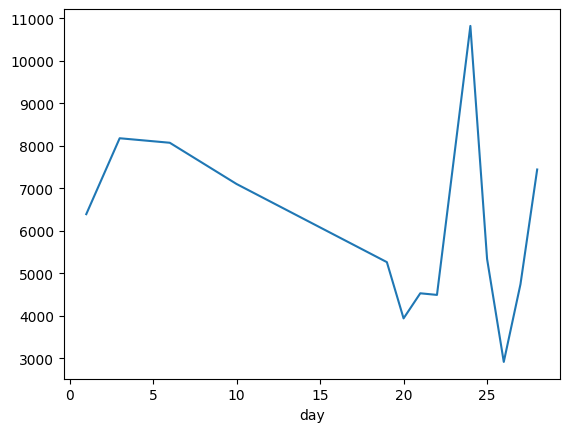

In [100]:
article_df_fa['text'].str.len().groupby(by=article_df_fa['day']).mean().plot()

<Axes: xlabel='date'>

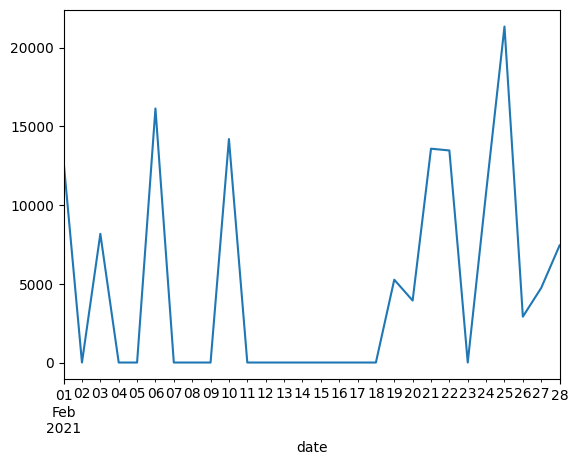

In [101]:
article_df_fa['text'].str.len().resample('D').sum().plot()

Text(0.5, 1.02, ' Athens Voice: Aριθμός των κειμένων για κάθε ημέρα')

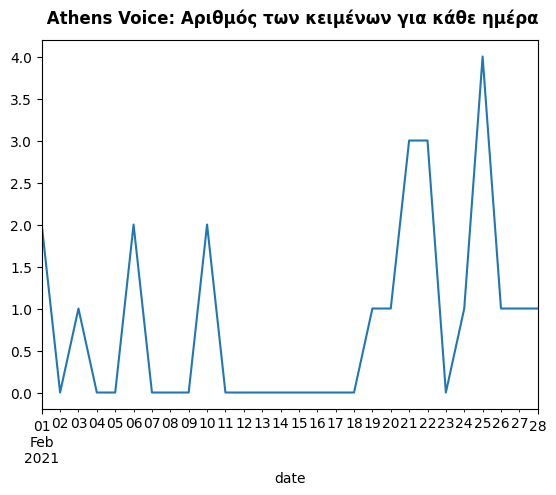

In [102]:
article_df_fa['text'].resample('D').count().plot()
plt.title(' Athens Voice: Aριθμός των κειμένων για κάθε ημέρα', y=1.02, fontweight='bold')

Text(0.5, 1.02, ' Athens Voice: Η συνολική τιμή της θετικότητας για κάθε ημέρα')

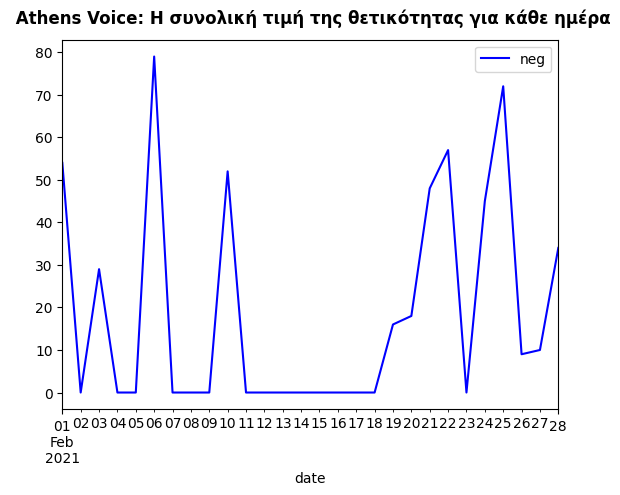

In [103]:
article_df_fa['negative'].resample('D').sum().plot(color = 'b',label = 'neg').legend()
plt.title(' Athens Voice: Η συνολική τιμή της θετικότητας για κάθε ημέρα', y=1.02, fontweight='bold')

Text(0.5, 1.02, ' Athens Voice: Συνολική τιμή της αρνητικότητας για κάθε ημέρα')

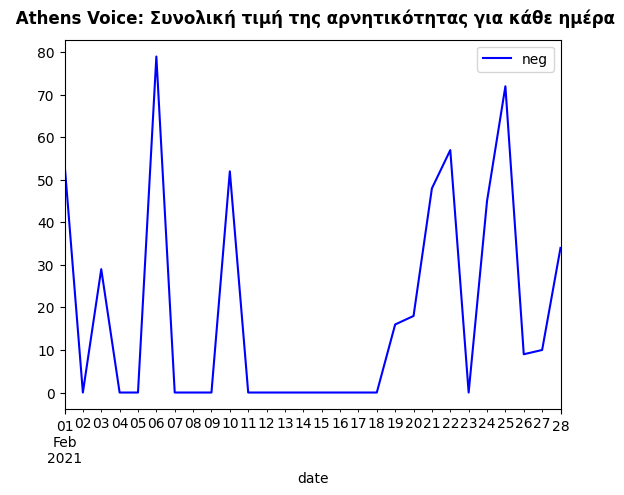

In [104]:
article_df_fa['negative'].resample('D').sum().plot(color = 'b',label = 'neg').legend()
plt.title(' Athens Voice: Συνολική τιμή της αρνητικότητας για κάθε ημέρα', y=1.02, fontweight='bold')

Text(0.5, 1.02, ' Athens Voice: Εμπιστοσύνη ')

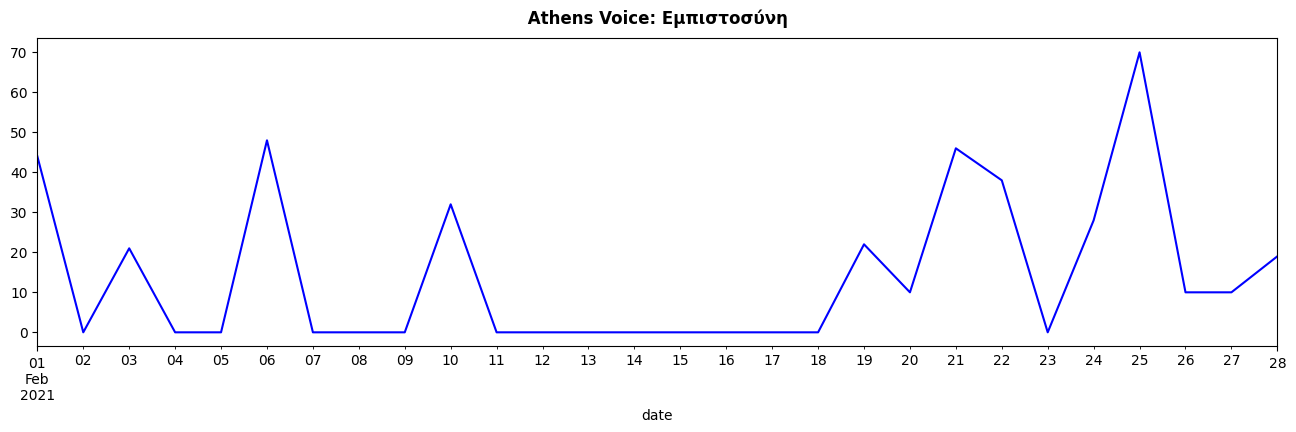

In [105]:
article_df_fa['trust'].resample('D').sum().plot(figsize=(16,4), color='blue')
plt.title(' Athens Voice: Εμπιστοσύνη ', y=1.02, fontweight='bold')

Text(0.5, 1.02, ' Athens Voice: Θυμός vs Χαρά')

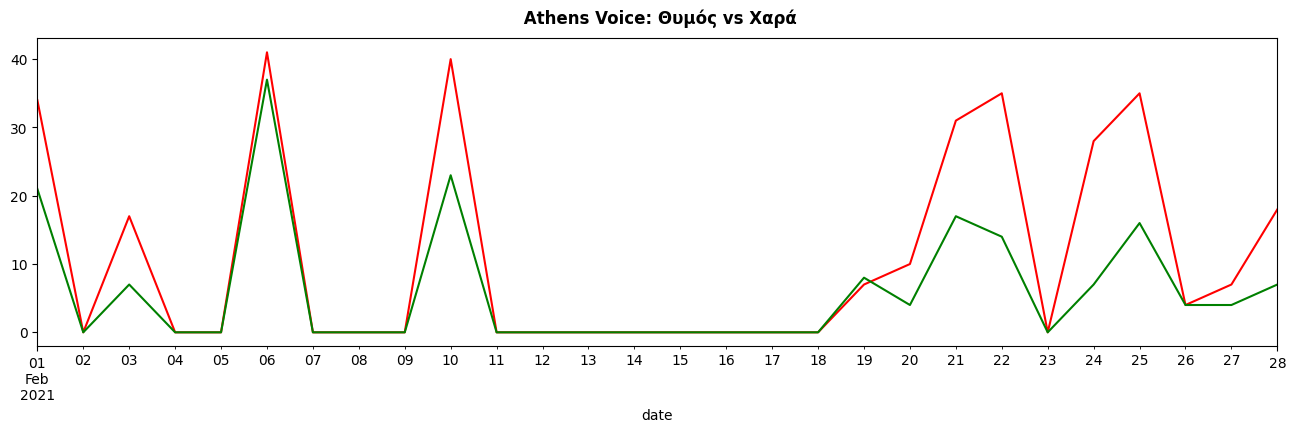

In [106]:
ax = article_df_fa['anger'].resample('D').sum().plot(figsize=(16,4), color = 'red')
article_df_fa['joy'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'green')
plt.title(' Athens Voice: Θυμός vs Χαρά', y=1.02, fontweight='bold')

Text(0.5, 1.02, ' Athens Voice: Θετικότητα vs Αρνητικότητα vs Εμπιστοσύνη')

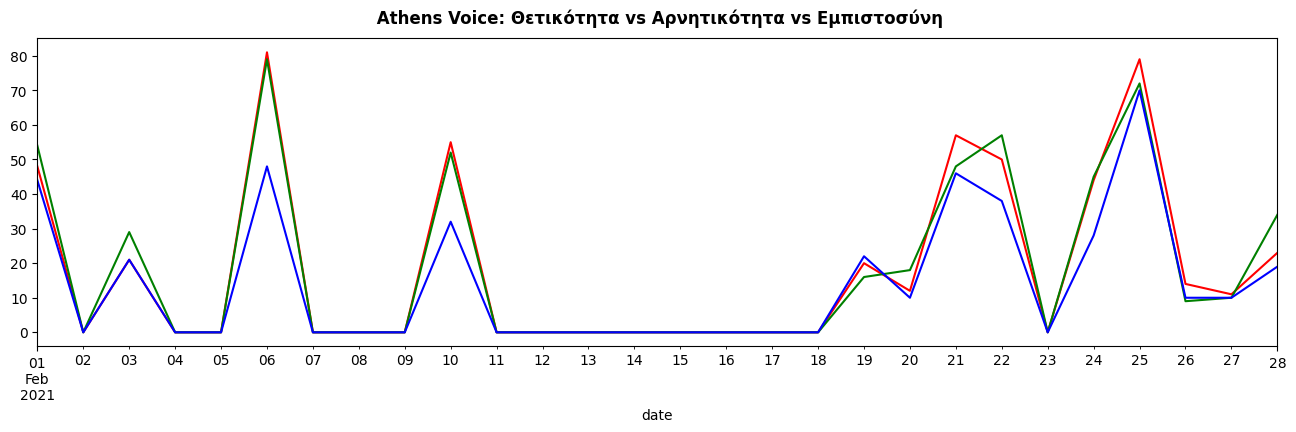

In [107]:
ax = article_df_fa['positive'].resample('D').sum().plot(figsize=(16,4), color = 'red')
article_df_fa['negative'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'green')
article_df_fa['trust'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'blue')
plt.title(' Athens Voice: Θετικότητα vs Αρνητικότητα vs Εμπιστοσύνη', y=1.02, fontweight='bold')

In [108]:
import matplotlib.pyplot as plt
plt.style.use('default')

In [109]:
#plt.style.use('classic')
#plt.style.use('ggplot')
plt.style.use('Solarize_Light2')
#plt.style.use('seaborn-v0_8-bright')

Text(0.5, 1.02, ' Newsbomb: Θετικότητα vs Αρνητικότητα vs Εμπιστοσύνη vs Αηδία')

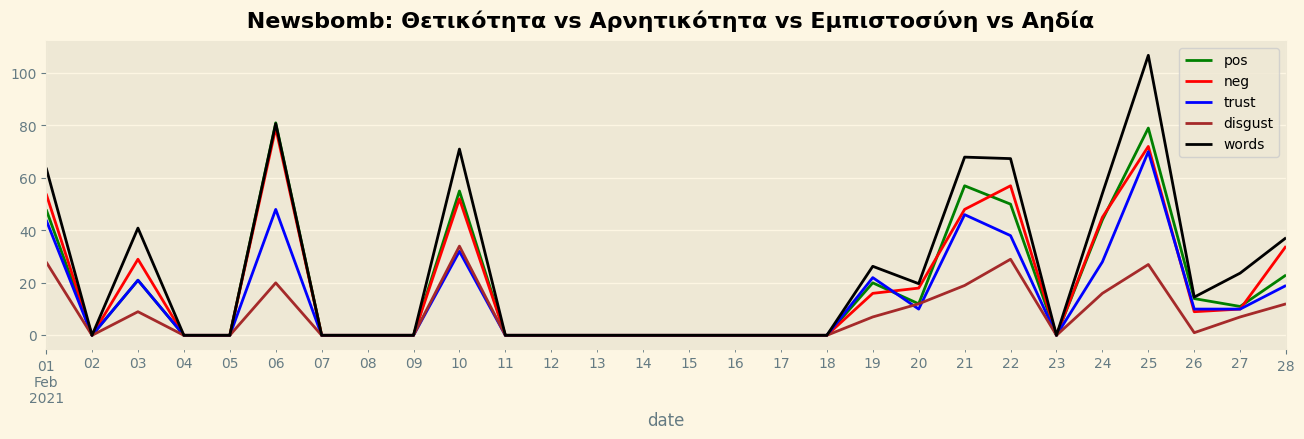

In [110]:
ax = article_df_fa['positive'].resample('D').sum().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
article_df_fa['negative'].resample('D').sum().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
article_df_fa['trust'].resample('D').sum().plot(figsize=(16,4), ax = ax,
                                                label = 'trust',color = 'blue').legend()
article_df_fa['disgust'].resample('D').sum().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'brown').legend()
(article_df_fa['text'].str.len().resample('D').sum()/200).plot(figsize=(16,4), ax = ax, # διαιρώ το mean των λέξεων με το 200 για να πλησιάσει στην κλίμακα τα άλλα
                                                label = 'words',color = 'black').legend()
plt.title(' Newsbomb: Θετικότητα vs Αρνητικότητα vs Εμπιστοσύνη vs Αηδία', y=1.02, fontweight='bold')

Text(0.5, 1.02, 'Athens Voice: Θετικότητα (+) vs Αρνητικότητα (-)')

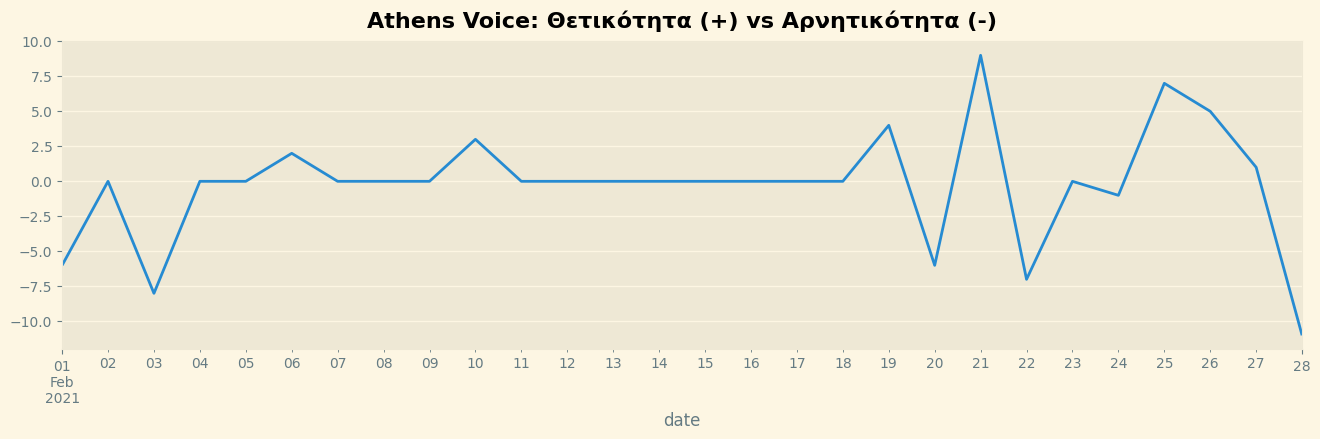

In [112]:
article_df_fa['pos/neg'] = article_df_fa['positive'] - article_df_fa['negative']
article_df_fa['pos/neg'].resample('D').sum().plot(figsize=(16,4))
plt.title('Athens Voice: Θετικότητα (+) vs Αρνητικότητα (-)', y=1.02, fontweight='bold')

In [113]:
#plt.style.use('grayscale')
plt.style.use('seaborn-v0_8-darkgrid')

In [114]:
article_df_fa['(+)φόβος | θυμός(-)'] = article_df_fa.positive*100//article_df_fa[['fear','anger']].sum(
        axis=1) - article_df_fa.negative*100//article_df_fa[['fear','anger']].sum(axis=1)

Text(0.5, 1.02, ' Athens Voice: Φόβος(+) vs θυμός (-) ')

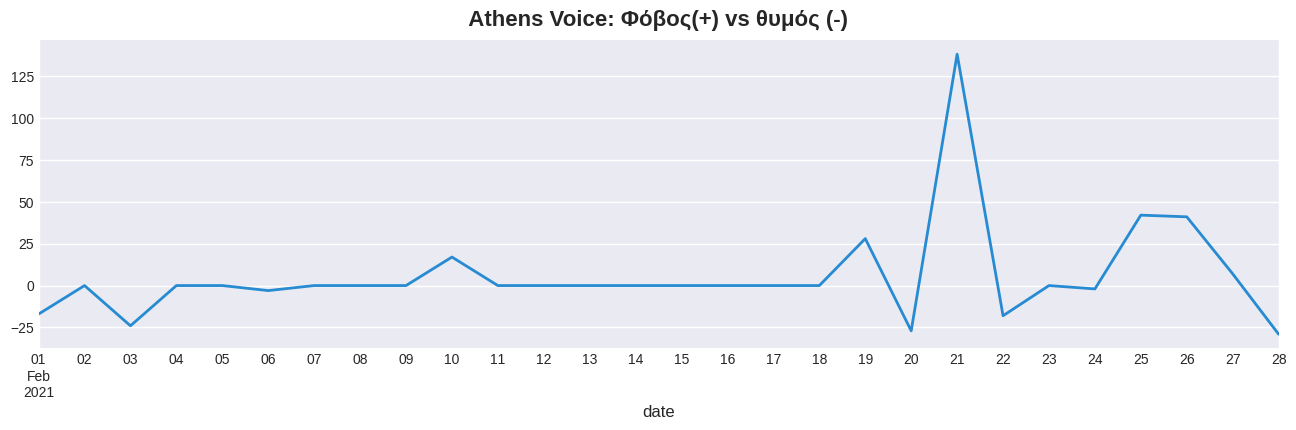

In [116]:
article_df_fa['(+)φόβος | θυμός(-)'].resample('D').sum().plot(figsize=(16,4))
plt.title(' Athens Voice: Φόβος(+) vs θυμός (-) ', y=1.02, fontweight='bold')